# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

# Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

# Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

# План работы
 
**План работы:**
 
1) Первичное исследование данных и выявление аномалий, ошибок в оформлении данных, потенциальных данных, которые в дальнейшем при работе с ними привести к ошибкам (это касается регистров, так как могут быть неявные ошибки в регистрах, которые могут как-то повлиять на работу). Вывести общую информацию по данным, определить их размер, проверить наличие пропусков, тип данных в столбцах, наличие дубликатов.
 
2) Предобработка данных и исправление выявленных аномалий, ошибок в оформлении данных, регистров, приведение данных в столбцах к необходимому формату. 
 
3) Более детальное исследование столбцов в таблицах, для того, чтобы иметь представление о том, ожидаемые ли данные указаны, есть ли какие-то аномалии и ошибки. 

4) Заполнение пропусков

5) Создать дополнительный столбец с определением срока, в течение которого пользователь использует услуги(end_data - begin_data).
 
6) Создать столбец, в котором для каждого пользователя указать пользуется он сейчас услугами или нет. И данный столбец будет target

7) Создать столбец с классификацией пользователей: 

    - использует только интернет
    - использует только телефон
    - использует то и другое
     
8) Подсчитать количество услуг, используемых каждым пользователем и тоже вынести это в отдельный столбец. Также создать столбец с классификацией пользователей по количеству месяцев использования услуг.
 
9) С учетом созданных признаков провести доплнительный исследовательский анализ данных, для того, чтобы иметь представление о том, какие люди уходят из компании (какие услуги они используют, сколько платят, сколько месяцев с компанией). Также выявить возможные корреляции данных

10) Провести кодировку для категориальных признаков, масштабирование для количественных признаков.

11) Разделить данные на тренировочную и тестовую, в соотношении 0.8: 0.2 соответственно

12) Проверить баланс классов. Если несбалансированно,то провести балансирование классов

13) Обучить модели:

     - Logistic Regression
     - LGBM Classifier
     - Decition Tree Classifier
     - RandomForest Classifier
     - CatBoost Classifier
     
     с подбором гиперпараметров черед GridSearch, и получить значение метрик AUC-ROC и accuracy
     
14) Протестировать модели и привести таблицу с полученными метриками.
 
15) Написать отчет.

# Основная часть

## Предобработка данных

### Общий обзор

В данном разделе мы:

1) прочитаем данные

2) проведем предварительный обзор данных

3) выявим ошибки, анамалии, неточности в данных

4) объединим таблицы

5) заполним пропуски

6) напишем вывод по разделу

In [1]:
# импортируем необходимые библиотеки
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import lightgbm as lgb

from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, roc_curve 
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# прочитаем данные
data_contract = pd.read_csv('....csv')
data_internet = pd.read_csv('....csv')
data_personal = pd.read_csv('....csv')
data_phone = pd.read_csv('....csv')

In [3]:
# выведем необходимую информацию по каждому датасету
dict_data = {'Данные контракта': data_contract, 'Данные по интернету': data_internet, 'Персональные данные': data_personal, 'Данные по телефону': data_phone}
for key, data in dict_data.items():
    print('-' * 100)
    print(key)
    display(data.head(10))
    print(f'Общая информация {key}')
    print(data.info())
    print()
    print(f'Названия колонок {key}')
    print(data.columns)
    print()
    print(f'Количество пропусков {key}')
    print(data.isna().sum())
    print()
    print(f'Количество дубликатов {key}')
    print(data.duplicated().sum())
    print()
    print()
    print()

----------------------------------------------------------------------------------------------------
Данные контракта


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


Общая информация Данные контракта
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Названия колонок Данные контракта
Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Количество пропусков Данные контракта
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBillin

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Общая информация Данные по интернету
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Названия колонок Данные по интернету
Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Количество пропусков Данные по интернету
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DevicePro

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Общая информация Персональные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Названия колонок Персональные данные
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

Количество пропусков Персональные данные
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Количество дубликатов Персональные данные
0



----------------------------------------------------------------------------------------------------
Данные по телефону


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Общая информация Данные по телефону
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Названия колонок Данные по телефону
Index(['customerID', 'MultipleLines'], dtype='object')

Количество пропусков Данные по телефону
customerID       0
MultipleLines    0
dtype: int64

Количество дубликатов Данные по телефону
0





In [4]:
# в дальнейшем при исследовании был обнаружен пропуск, проверяю, как данные выглядят до изменения типа столбца total_charges
data_contract[data_contract['customerID'] == '4075-WKNIU']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Здесь подозрение подтверддилось, в исходном датасете в столбце total_charges есть строки без указания каких-либо данных

In [5]:
# выведем размеры датасетов
for key, data in dict_data.items():
    print(f'Размер {key}: {data.shape}')

Размер Данные контракта: (7043, 8)
Размер Данные по интернету: (5517, 8)
Размер Персональные данные: (7043, 5)
Размер Данные по телефону: (6361, 2)


Как видим датасеты имеют различное количество строк, хотя казалось бы по всем имеющися клиентам должна быть заполнена информация во всех таблицах. По этому пункту нужно уточнение и будем разбираться дальше

In [6]:
# процент пропуска данных в таблице internet:
print(f'Процент пропуска данных в таблице internet: {round(((data_contract.shape[0] - data_internet.shape[0]) / data_contract.shape[0]) * 100, 2)}%')

Процент пропуска данных в таблице internet: 21.67%


In [7]:
# процент пропуска данных в таблице phone:
print(f'Процент пропуска данных в таблице internet: {round(((data_contract.shape[0] - data_phone.shape[0]) / data_contract.shape[0]) * 100, 2)}%')

Процент пропуска данных в таблице internet: 9.68%


 Мы рассмотрели данные из четырех файлов: 

 - `contract.csv` — информация о договоре;
 - `personal.csv` — персональные данные клиента;
 - `internet.csv` — информация об интернет-услугах;
 - `phone.csv` — информация об услугах телефонии.

 После предварительного просмотра данных из четырех таблиц можно сделать выводы:

1) данные в представленных таблицах полные, в них нет пропусков и дубликатов
 
2) для дальнейшей корректной работы и дальнейшего анализа данных необходимо:
 
     - привести названия столбцов к змеиному регистру
     - привести все данные к нижнему регистру, так как можно совершить ошибку при обращении к данным, кроме того из-за разных регистров могут быть неявнеые дубликаты
     - изменииь тип столбцов в таблице contract.csv: begin_date на формат datetime, total_charge на формат float
 
Сделаем необходимые преобразования для дальнейшей корректной работы.

In [8]:
# изменим названия столбцов в таблице contract
data_contract = data_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date',
                                             'Type': 'type', 'PaperlessBilling':'paperless_billing', 'PaymentMethod': 'payment_method',
                                             'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'})

In [9]:
# проверим изменения
data_contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [10]:
# изменим названия столбцов в таблице internet
data_internet = data_internet.rename(columns={'customerID': 'customer_id', 'InternetService': 'internet_service', 
                                             'OnlineSecurity': 'online_security', 'OnlineBackup' : 'online_backup',
                                             'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support',
                                             'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'})

In [11]:
# проверим изменения
data_internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [12]:
# изменим названия столбцов в таблице personal
data_personal = data_personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen',
                                             'Partner': 'partner', 'Dependents': 'dependents'})

In [13]:
# проверим изменения
data_personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

In [14]:
# изменим названия столбцов в таблице phone
data_phone = data_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'})

In [15]:
# проверим изменения
data_phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

In [16]:
# изменим тип столбца begin_date в таблице contract
data_contract['begin_date'] = data_contract['begin_date'].astype('datetime64[ns]')

In [17]:
# изменим тип столбца total_charges в таблице contract. Для операции преобразования строки в число используем to_numeric
data_contract['total_charges'] = pd.to_numeric(data_contract['total_charges'], errors='coerce')

In [18]:
# посмотрим на изменения типов
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [19]:
# выберем столбцы object из таблицы contract для приведения к нижнему регистру
list_columns = list(data_contract.select_dtypes(include='object'))

In [20]:
# приведем к нижнему регистру
for column in list_columns:
    data_contract[column] = data_contract[column].str.lower()

In [21]:
# проверим изменения
data_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-vhveg,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85
1,5575-gnvde,2017-04-01,no,one year,no,mailed check,56.95,1889.50
2,3668-qpybk,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15
3,7795-cfocw,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75
4,9237-hqitu,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65


In [22]:
# проверим наличие дубликатов после приведения к нижнему регистру
data_contract.duplicated().sum()

0

In [23]:
# выберем столбцы object из таблицы internet для приведения к нижнему регистру
list_columns_internet = list(data_internet.select_dtypes(include='object'))

In [24]:
# приведем к нижнему регистру
for column in list_columns_internet:
    data_internet[column] = data_internet[column].str.lower()

In [25]:
# проверим изменения
data_internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-vhveg,dsl,no,yes,no,no,no,no
1,5575-gnvde,dsl,yes,no,yes,no,no,no
2,3668-qpybk,dsl,yes,yes,no,no,no,no
3,7795-cfocw,dsl,yes,no,yes,yes,no,no
4,9237-hqitu,fiber optic,no,no,no,no,no,no


In [26]:
# проверим наличие дубликатов после приведения к нижнему регистру
data_internet.duplicated().sum()

0

In [27]:
# выберем столбцы object из таблицы personal для приведения к нижнему регистру
list_columns_personal = list(data_personal.select_dtypes(include='object'))

In [28]:
# приведем к нижнему регистру
for column in list_columns_personal:
    data_personal[column] = data_personal[column].str.lower()

In [29]:
# проверим изменения
data_personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-vhveg,female,0,yes,no
1,5575-gnvde,male,0,no,no
2,3668-qpybk,male,0,no,no
3,7795-cfocw,male,0,no,no
4,9237-hqitu,female,0,no,no


In [30]:
# проверим наличие дубликатов после приведения к нижнему регистру
data_personal.duplicated().sum()

0

In [31]:
# выберем столбцы object из таблицы phone для приведения к нижнему регистру
list_columns_phone = list(data_phone.select_dtypes(include='object'))

In [32]:
# приведем к нижнему регистру
for column in list_columns_phone:
    data_phone[column] = data_phone[column].str.lower()

In [33]:
# проверим изменения
data_phone.head()

,customer_id,multiple_lines
0,5575-gnvde,no
1,3668-qpybk,no
2,9237-hqitu,no
3,9305-cdskc,yes
4,1452-kiovk,yes


In [34]:
# проверим наличие дубликатов после приведения к нижнему регистру
data_phone.duplicated().sum()

0

**Вывод:** в данном разделе были рассмотрены данные из четырех файлов: 
 
 - `contract.csv` — информация о договоре;
 - `personal.csv` — персональные данные клиента;
 - `internet.csv` — информация об интернет-услугах;
 - `phone.csv` — информация об услугах телефонии.
 
После предварительного просмотра данных из четырех таблиц можно сделать выводы:

1) данные в представленных таблицах полные, в них нет пропусков и дубликатов

2) для дальнейшей корректной работы и дальнейшего анализа данных необходимо:
 
     - привести названия столбцов к змеиному регистру
     - привести все данные к нижнему регистру, так как можно совершить ошибку при обращении к данным, кроме того из-за разных регистров могут быть неявнеые дубликаты
     - изменить тип столбцов в таблице contract.csv: begin_date на формат datetime, total_charge на формат float
 
3) были сделаны указанные преобразования: данные приведены к нижнему регистру, изменены типы столбцов их их названия. 

4) было выявлено, что таблицы имеют разное количество строк, и с этим момоентом нужно разбираться дальше.

Таким образом, все данные приедены в порядок: названия столбцов приведены к неоходимому регистру, все данные в строчном регистре. Ошибок при обработке данных быть не должно, дубликатов нет. Проведем более детальное исследование каждой таблицы и каждого столбца

### Детальный анализ данных в талбицах

#### Анализ таблицы contract

In [35]:
# проанализируем столбец begin_date
data_contract['begin_date'].describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: begin_date, dtype: object

In [36]:
# проанализируем столбец end_date
data_contract['end_date'].value_counts()

no                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [37]:
# проанализируем столбец type
data_contract['type'].value_counts()

month-to-month    3875
two year          1695
one year          1473
Name: type, dtype: int64

In [38]:
# проанаизируем столбец paperless_billing
data_contract['paperless_billing'].value_counts()

yes    4171
no     2872
Name: paperless_billing, dtype: int64

In [39]:
# проанализируем столбец payment_method
data_contract['payment_method'].value_counts()

electronic check             2365
mailed check                 1612
bank transfer (automatic)    1544
credit card (automatic)      1522
Name: payment_method, dtype: int64

In [40]:
# проанализируем столбец monthly_charges
data_contract['monthly_charges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

In [41]:
# проанализируем столбец total_charges
data_contract['total_charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: total_charges, dtype: float64

Уточним информацию по столбцу total_charges, так как при подсчете общего количества строк получалост 7043, а при подсчете методом describe() получилось 7032 числовых значений. Нужно уточнить, какие данные содержатся в 11 строках

In [42]:
data_contract['total_charges'].sort_values().unique()

array([  18.8 ,   18.85,   18.9 , ..., 8672.45, 8684.8 ,     nan])

In [43]:
data_contract[data_contract['total_charges'].isna() == True]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-lvygi,2020-02-01,no,two year,yes,bank transfer (automatic),52.55,NaN
753,3115-czmzd,2020-02-01,no,two year,no,mailed check,20.25,NaN
936,5709-lvoeq,2020-02-01,no,two year,no,mailed check,80.85,NaN
1082,4367-nuyao,2020-02-01,no,two year,no,mailed check,25.75,NaN
1340,1371-dwpaz,2020-02-01,no,two year,no,credit card (automatic),56.05,NaN
3331,7644-omvmy,2020-02-01,no,two year,no,mailed check,19.85,NaN
3826,3213-vvolg,2020-02-01,no,two year,no,mailed check,25.35,NaN
4380,2520-sgtta,2020-02-01,no,two year,no,mailed check,20.00,NaN
5218,2923-arzlg,2020-02-01,no,one year,yes,mailed check,19.70,NaN
6670,4075-wkniu,2020-02-01,no,two year,no,mailed check,73.35,NaN


После преобразования данных мы плучили скрытые пропуски. В первоначальной таблице данныее в столбце total_charges у 11 пользователей  были пропущены, так как эти пользователи подключились только 01.02.2020. Поэтому у нас получилось меньшее количество значений при подсчете методом describe()

In [44]:
data_contract.isna().sum()

customer_id           0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
dtype: int64

#### Анализ данных в таблице internet

In [45]:
# проанализируем столбец internet_service
data_internet['internet_service'].value_counts()

fiber optic    3096
dsl            2421
Name: internet_service, dtype: int64

In [46]:
# проанализируем столбец inline_security
data_internet['online_security'].value_counts()

no     3498
yes    2019
Name: online_security, dtype: int64

In [47]:
# проанализируем столбец online_backup
data_internet['online_backup'].value_counts()

no     3088
yes    2429
Name: online_backup, dtype: int64

In [48]:
# проанализируем столбец tech_support
data_internet['tech_support'].value_counts()

no     3473
yes    2044
Name: tech_support, dtype: int64

In [49]:
# проанализируем столбец streaming_tv
data_internet['streaming_tv'].value_counts()

no     2810
yes    2707
Name: streaming_tv, dtype: int64

In [50]:
# проанализируем столбец streaming_movies
data_internet['streaming_movies'].value_counts()

no     2785
yes    2732
Name: streaming_movies, dtype: int64

Столбцы таблицы internet проанализировали. В целом ничего необычного не увидели, данные были ожидаемыми.

#### Проанализируем таблицу personal

In [51]:
# проанализируем столбец gender
data_personal['gender'].value_counts()

male      3555
female    3488
Name: gender, dtype: int64

In [52]:
# проанализируем столбец senior_citizen
data_personal['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [53]:
# проаналиируем столбец partner
data_personal['partner'].value_counts()

no     3641
yes    3402
Name: partner, dtype: int64

In [54]:
# проанализируем столбец dependents
data_personal['dependents'].value_counts()

no     4933
yes    2110
Name: dependents, dtype: int64

Столбцы таблицы personal проанализировали. В целом ничего необычного не увидели, данные были ожидаемыми.

#### Анализ данных в таблице phone

In [55]:
# проанализируем столбец multiple_lines
data_phone['multiple_lines'].value_counts()

no     3390
yes    2971
Name: multiple_lines, dtype: int64

Столбцы таблицы phone проанализировали. В целом ничего необычного не увидели, данные были ожидаемыми.

**Вывод:** в ходе проведенных исследованй таблиц в разделах 1.2-1.5 можно увидеть, что данные соответствуют ожидаемым.


### Объединение таблиц и заполнение пропусков

Объединим все таблицы для того, чтобы понять причину пропусков в таблице internet и phone и для более удобной работы с данными

In [56]:
data_personal_contract = pd.merge(data_personal, data_contract)

In [57]:
data_personal_contract_internet = pd.merge(data_personal_contract, data_internet, how='left')

In [58]:
data_full = pd.merge(data_personal_contract_internet, data_phone, how='left')

In [59]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   gender             7043 non-null   object        
 2   senior_citizen     7043 non-null   int64         
 3   partner            7043 non-null   object        
 4   dependents         7043 non-null   object        
 5   begin_date         7043 non-null   datetime64[ns]
 6   end_date           7043 non-null   object        
 7   type               7043 non-null   object        
 8   paperless_billing  7043 non-null   object        
 9   payment_method     7043 non-null   object        
 10  monthly_charges    7043 non-null   float64       
 11  total_charges      7032 non-null   float64       
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

In [60]:
# напишем функцию для подсчета количества пропусков и процентного соотношения
def missing_values_percentage(df):
    """
    Функция, подсчитавающая пропуски количественно и в процентном соотношении
    """
    count=round(df.isnull().sum(),2)
    percent=round((df.isnull().sum()/df.shape[0])*100,2)
    data=pd.concat([count,percent],axis=1)
    data.reset_index(inplace=True)
    data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
    display(data[data['Missing Values Count']!=0].sort_values(by = 'Missing Values %', ascending = False))

In [61]:
missing_values_percentage(data_full)

,index,Missing Values Count,Missing Values %
12,internet_service,1526,21.67
13,online_security,1526,21.67
14,online_backup,1526,21.67
15,device_protection,1526,21.67
16,tech_support,1526,21.67
17,streaming_tv,1526,21.67
18,streaming_movies,1526,21.67
19,multiple_lines,682,9.68
11,total_charges,11,0.16


In [62]:
data_full[data_full['internet_service'].isna() == True].head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
11,7469-lkbci,male,0,no,no,2018-10-01,no,two year,no,credit card (automatic),18.95,326.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
16,8191-xwszg,female,0,no,no,2015-10-01,no,one year,no,mailed check,20.65,1022.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
21,1680-vdcww,male,0,yes,no,2019-02-01,no,one year,no,bank transfer (automatic),19.80,202.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
22,1066-jksgk,male,0,no,no,2019-11-01,2019-12-01 00:00:00,month-to-month,no,mailed check,20.15,20.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
33,7310-egvhz,male,0,no,no,2020-01-01,no,month-to-month,no,bank transfer (automatic),20.20,20.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [63]:
data_full[data_full['multiple_lines'].isna() == True].head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85,dsl,no,yes,no,no,no,no,NaN
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75,dsl,yes,no,yes,yes,no,no,NaN
7,6713-okomc,female,0,no,no,2019-04-01,no,month-to-month,no,mailed check,29.75,301.90,dsl,yes,no,no,no,no,no,NaN
20,8779-qrdmv,male,1,no,no,2019-11-01,2019-12-01 00:00:00,month-to-month,yes,electronic check,39.65,39.65,dsl,no,no,yes,no,no,yes,NaN
27,8665-utdhz,male,0,yes,yes,2019-11-01,2019-12-01 00:00:00,month-to-month,no,electronic check,30.20,30.20,dsl,no,yes,no,no,no,no,NaN


В данном случае не понятна причина, по которой отсутствуют данные в 1526 строке. Возможно, данные клиенты не используют интернет, а используют только телефонную связь. Тогда возникаеть вопрос, как заполнить эти пропуски. Как мне кажется, данный момент нужно утонить у тех, ктоо предоставлял информацию. То жк самое касается и 684 строк пользователей, у которых есть пропсуки в таблице phone, но при этом заполнены все графы, связанные с талицей internrt. Пересекающихся значений здесь нет, поэтому не совсем понятно, почему эти данные отсуттвуют. В ходе изучения данного вопроса каких-то корреляций с другими параметрами я не увидела.

Как мы выяснили, пропуски связаны с тем, что пользователи совсем не пользуются тем или иным видом услуг, поэтому пропуски заменим на No, а для новых клиентов обзий платеж поставим 0, так они только подключились

In [64]:
# запоним пропуски в столбце total_cgarges для 11 строк
data_full.loc[data_full['total_charges'].isna() == True, 'total_charges'] = 0

In [65]:
# проверим запонение
data_full[data_full['customer_id'] == '4075-wkniu']

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
6670,4075-wkniu,female,0,yes,yes,2020-02-01,no,two year,no,mailed check,73.35,0.0,dsl,no,yes,yes,yes,yes,no,yes


Те пропуски в строках, которые относятся к таблице интернет, и означат, что пользователи не используют данные услуги, мы замеим на 'no'. Но для начала заполним пропуски в стоблюце multiple_lines. Как мы выяснили пропсуки также ознчают, что клиент данной услугой не пользуется. Но в данном столбце уже наши признаки разделяются на 'yes' и 'no', что говорит о том, использует ли пользователь несколько линий на тарифе с телефоном. Таким образом, для избежания проблем при интерпретации результатов предлагаю:

    - пропуски заменить на 'no'
    - если 'no' уже есть, то это означает, что на тарифе одна линия и соответственно удобнее заменить на 'one'
    - если 'yes', то это означает, что на тарифе несколько линий и это можно заменить на 'multiple'
    
Для этого создадим новый столбец phone_lines, старый столбец удалим.

In [66]:
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85,dsl,no,yes,no,no,no,no,NaN
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,56.95,1889.50,dsl,yes,no,yes,no,no,no,no
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15,dsl,yes,yes,no,no,no,no,no
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75,dsl,yes,no,yes,yes,no,no,NaN
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65,fiber optic,no,no,no,no,no,no,no


In [67]:
# заполним пропуски в столбце multiple_lines
data_full['phone_lines'] = data_full['multiple_lines'].apply(lambda x: 'one' if x=='no' else ('multiple' if x=='yes' else 'not use'))
data_full = data_full.drop('multiple_lines', axis=1)

In [68]:
# проверим заполнение
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone_lines
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,29.85,29.85,dsl,no,yes,no,no,no,no,not use
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,56.95,1889.50,dsl,yes,no,yes,no,no,no,one
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,53.85,108.15,dsl,yes,yes,no,no,no,no,one
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),42.30,1840.75,dsl,yes,no,yes,yes,no,no,not use
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,70.70,151.65,fiber optic,no,no,no,no,no,no,one


Теперь осталось обработать пропуски в столбцах, связанных с тарифами интернета.

In [69]:
# отберем столбцы с пропусками
missing_values_in_column = []
for column in data_full.columns:
    if data_full[column].isna().sum() > 0:
        missing_values_in_column.append(column)

In [70]:
# столбцы с отсутствующими значениями
missing_values_in_column

['internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies']

In [71]:
# заполним пропуски в указанных столбцах
for column in missing_values_in_column:
    data_full[column] = data_full[column].fillna('no')

In [72]:
data_full.isna().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
phone_lines          0
dtype: int64

Таким образом видим, что все пропуски обработаны

### Вывод

Мы рассмотрели данные из четырех файлов: 

    - `contract.csv` — информация о договоре;
    - `personal.csv` — персональные данные клиента;
    - `internet.csv` — информация об интернет-услугах;
    - `phone.csv` — информация об услугах телефонии.
 
В файле contract.csv - таблица из 7043 строк с 8 колонками:

    - customer_id - id клиента
    - begin_date - дата подключения
    - end_date (дата/no) - дата отключения/ no - если клиент пользуется услугами
    - type (month-to-month/one year/two year) - периодичность оплаты счетов
    - paperless_billing (yes/no) - электронный документ об оплате
    - payment_method (electronic check/mailed check/bank transfer (automatic)/credit card (automatic)) - способы оплаты
    - monthly_charges - сумма ежемесячного платежа
    - total_charges - итоговая сумма платежа
    
В файле personal.csv - таблица из 5517 строк и 8столбцов:
- customer_id - id клиента
    - internet_service (fiber optic/dsl) - способ подключения к интернету
    - online_security (yes/no) - защита online
    - online_backup (yes/no) - резервное копирование online
    - device_protection (yes/no) - антивирус
    - tech_support (yes/no) - поддержка
    - streaming_tv (yes/no) - стриминговое тв
    - streaming_movie (yes/no) - стриминговое кино
    
В файле personal.csv - 7043 строк и 5 столбцов:

    - customer_id - id клиента
    - gender (male/female) - пол
    - senior_citizen (0, 1) - пенсионер (1 пенсионер, 0 - не пенсионер)
    - partner (yes/no) - наличие супруги/а
    - dependents (yes/no) - наличие иждивенцев
    
В файле phone.csv - 6361 строк и 2 столбца:

    - customer_id - id клиента
    - multiple_line (yes/no) - наличие возможности ведения параллельных линий во время звонка

 После предварительного просмотра данных из четырех таблиц можно сделать выводы:
1) данные в представленных таблицах полные, в них нет пропусков и дубликатов, но после объединения есть пропуски, так как часть пользователей использует только интернет, часть только телефон, а некоторые используют телефон и интернет одновременно
 
2) для дальнейшей корректной работы исправили некоторые неточности (привели названия столбцов к змеиному регистру, привели все данные к нижнему регистру, так как можно совершить ошибку при обращении к данным, кроме того из-за разных регистров могут быть неявные дубликаты, изменили тип столбцов в таблице contract.csv: begin_date на формат datetime, total_charge на формат float
 
3) объединили таблицы

4) заполнили пропуски: 

    - для тех, кто только подключился заполнили пропуски в графе total_charges на 0
    - пропуски, образовавшиеся после присоединения таблицы interet заполнили на 'no', так как пользователи этими услугами не пользовались
    - пропуски, образовавшиеся после присоединения таблицы phone в столбце multiple_line заполнили следующим образом:
    
        - если был nan, то человек не пользовался услугами, заполнили на 'no'
        - если был 'no' - человек пользовался услугой, но не имел возможности ведения параллельных разговоров, заполнили на 'yes'
        - если был 'yes' - человек пользовался услугами телефона и имел возможность ведения параллельных разговоров, заполнили на 'multiple'
        
        
Таким образом предварительный обзор данных был завершен. Все неточности и пропуски были исправлены. Можем приступать к исследовательскому анализу данных.

## Исследовательский анализ

В данном разделе:

1) добавим столбцы с дополнительными признаками:

    - создадим столбец целевой признак: заменим даты на 1, и 'no' на 0
    - рассчитаем количество дней использования услуг для каждого пользователя
    - рассчитаем количество используемых услуг для каждого пользователя
    - классифицируем пользователей по видам используемых услуг (только интернет, только телефон, интернет и телефон
    
2) проведем исследовательский анализ данных для получения информации об используемых услугах

3) напишем вывод

### Добавление столбцов

In [73]:
# создадим столбец - целевой признак
data_full['churn'] = data_full['end_date'].apply(lambda x: 0 if x == 'no' else 1)

In [74]:
# создадим столбец, в котором укажем для всех пользователей даты окончания углаг, проэтом, если пользователь
# использует услуги, то поставим ему дату выгрузки данных: 2020-02-01
data_full['end_date_date'] = data_full['end_date'].apply(lambda x: '2020-02-01' if x =='no' else x)
data_full['end_date_date'] = pd.to_datetime(data_full['end_date_date'])

In [75]:
# расчитаем количество дней использования услуг и приведем полученную величину к формату int
data_full['duration_in_days'] = round((data_full['end_date_date'] - data_full['begin_date']) / np.timedelta64(1, 'D'), 0)
data_full['duration_in_days'] = data_full['duration_in_days'].astype('int')

In [76]:
# выведем датасет
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone_lines,churn,end_date_date,duration_in_days
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,...,no,yes,no,no,no,no,not use,0,2020-02-01,31
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,...,yes,no,yes,no,no,no,one,0,2020-02-01,1036
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,...,yes,yes,no,no,no,no,one,1,2019-12-01,61
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),...,yes,no,yes,yes,no,no,not use,0,2020-02-01,1371
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,...,no,no,no,no,no,no,one,1,2019-11-01,61


In [77]:
# напишем функцию для одсчета услуг по каждому пользователю
def services_count (row):
    """
    Функция, суммирующая количество услуг по каждому пользователю
    
    return: количество услуг
    """
    count = 0
    
    if row['internet_service'] != 'no':
        count += 1  
    if row['online_security'] == 'yes':
        count += 1  
    if row['online_backup'] == 'yes':
        count += 1  
    if row['device_protection'] == 'yes':
        count += 1  
    if row['tech_support'] == 'yes':
        count += 1 
    if row['streaming_tv'] == 'yes':
        count += 1  
    if row['streaming_movies'] == 'yes':
        count += 1  
    if row['phone_lines'] == 'one':
        count += 1  
    if row['phone_lines'] == 'multiple':
        count += 2
        
    return count

In [78]:
# применим данную функцию хдля подсчета используемых каждым клиентов услуг
data_full['services_count'] = data_full.apply(services_count, axis=1).astype('Int64')

In [79]:
# выведем на экран дадасет
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,phone_lines,churn,end_date_date,duration_in_days,services_count
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,...,yes,no,no,no,no,not use,0,2020-02-01,31,2
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,...,no,yes,no,no,no,one,0,2020-02-01,1036,4
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,...,yes,no,no,no,no,one,1,2019-12-01,61,4
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),...,no,yes,yes,no,no,not use,0,2020-02-01,1371,4
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,...,no,no,no,no,no,one,1,2019-11-01,61,2


In [80]:
# разделим клиентов на группы используемых услуг
def user_type (row):
    """
    Функция, разделяющая пользователей на группы: толко интернет, только телефон, интернет и телефон
    
    return возвращает группу пользователя
    """
    internet_user = row['internet_service']
    phone_user = row['phone_lines']
    
    if (internet_user == 'fiber optic' or internet_user == 'dsl') and (phone_user =='one' or phone_user =='multiple'):
        return 'internet and phone'
    
    elif (internet_user == 'fiber optic' or internet_user == 'dsl'):
        return 'only internet'
    
    elif phone_user =='one' or phone_user =='multiple':
        return 'only phone'
    
    else:
        return 'unknown type'

In [81]:
# применим данную функцию для каждого клиента
data_full['user_type'] = data_full.apply(user_type, axis=1)

In [82]:
# выведем на экран датасет
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,device_protection,tech_support,streaming_tv,streaming_movies,phone_lines,churn,end_date_date,duration_in_days,services_count,user_type
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,...,no,no,no,no,not use,0,2020-02-01,31,2,only internet
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,...,yes,no,no,no,one,0,2020-02-01,1036,4,internet and phone
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,...,no,no,no,no,one,1,2019-12-01,61,4,internet and phone
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),...,yes,yes,no,no,not use,0,2020-02-01,1371,4,only internet
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,...,no,no,no,no,one,1,2019-11-01,61,2,internet and phone


Необходимые столбцы были созданы, проведем исследовательский анализ данных

### Исследовательский анализ данных

В данном подразделе:

1) опишем распределения категориальных признаков: 

    - пол
    - пенсионер/ не пенсионер
    - наличие иждевенцев
    - наличие супруги/га
    - периодичность оплаты
    - способ оплаты
    
2) рассмотрим распределения количественных признаков: построим графики и боксплоты

3) определим корреляцию признаков

4) анализ влияния качественных и количественных признаков на уход клиента

#### Распределение категориальных признаков

**Пол клиента**

In [83]:
# напишем функцию для построения распределения признаков
def categorical_distribution(data, column):
    """
    Функция для построения графика по категориальным признакам, если таких признаков два
    """
    colors = ['#cc66ff','#00cc00']
    ax = ((data[column].value_counts() * 100.0) / data.shape[0]).plot(kind='bar', stacked = True, rot = 0, color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Процент клиентов')
    ax.set_xlabel(column)
    ax.set_ylabel(f'Процент {column}')
    ax.set_title(f'{column} distribution')

    totals = []
    for i in ax.patches:
        totals.append(i.get_width())

    total = sum(totals)
    for i in ax.patches:
        ax.text(i.get_x() + .15, i.get_height() - 5.5, str(round((i.get_height() / total), 1)) + '%',
                fontsize=12,
                color='white',
                weight = 'bold')
    plt.show()

In [84]:
def pie_distribution(data, column):
    """
    Функция построения графика по категориальным признакам, если таких признаков больше двух
    """
    (data[column].value_counts() * 100.0 / len(data)).plot.pie(autopct='%.1f%%', 
                                                               figsize =(8, 8), 
                                                               fontsize = 12)              

In [85]:
# создадим список признаков
list_demography = ['gender', 'senior_citizen', 'partner', 'dependents']

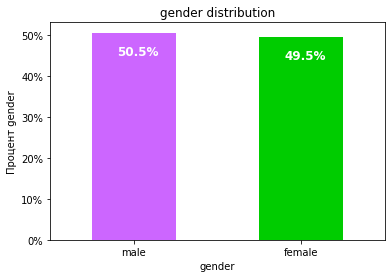

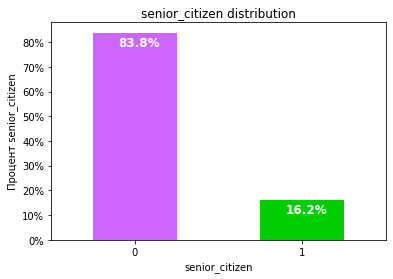

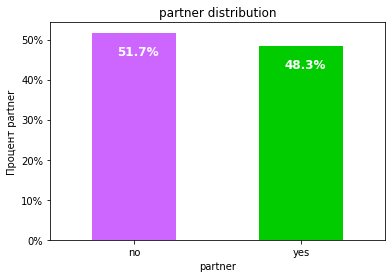

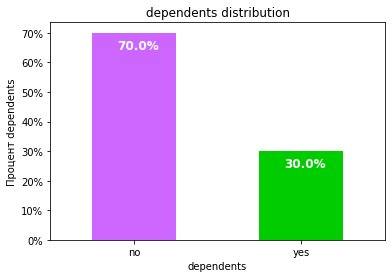

[None, None, None, None]

In [86]:
# построим графики
[categorical_distribution(data_full, item) for item in list_demography]

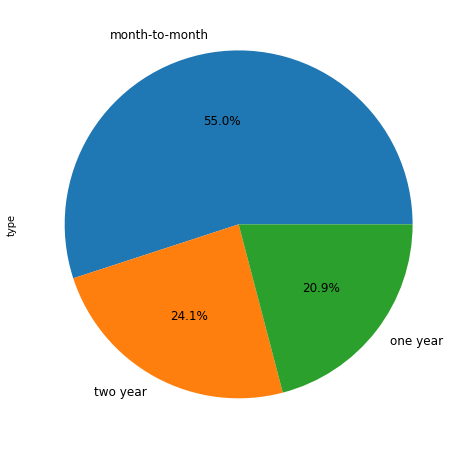

In [87]:
# построим диаграмму по периодичности оплаты
pie_distribution(data_full, 'type')

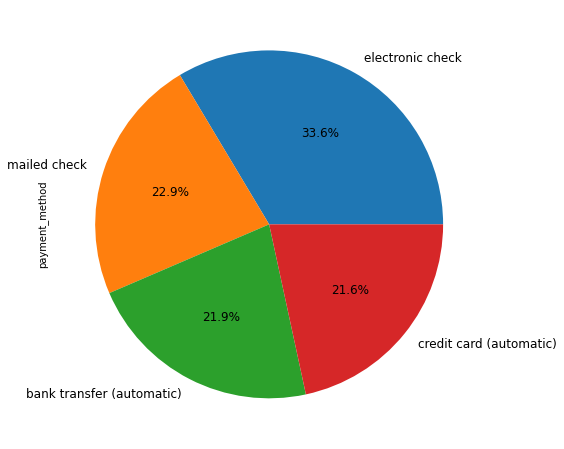

In [88]:
# по способу оплаты
pie_distribution(data_full, 'payment_method')

По полученным графикам видно, что:

1) количество мужчин и женщин клиентов примерно одинаковое: 50,5% и 49,5% соответсвенно

2) количество клиентов лидируют не пенсионеы - 83,3%, а  пенсионеры составляют - 16,2%

3) количество клиентов, у которых есть супруг/супруга примерно одинаковое: нет партнера - 51,7%, есть партнер - 48,3%

4) по количеству иждевенцев присутвуют значительные различия: у кого есть иждевенцы составляют - 30%, у оставшихся 70% иждевенцев нет

5) по периодичности оплаты лидирует month-to-month - 55%, и примерно одинаковое распределение пользователей по two year и one year оплате: 24,1% и 20,9% соответственно

6) по способу оплаты лидирует electronic check - 33,6%, остальные способы оплаты имеют примерно одинаковые доли: mailed check - 22,9%, bank transfer (automatic) - 21,9%, credit card (automatic) - 21,6%

#### Распределение количественных признаков

Напишем функцию для построения графиков и боксплотов для количественных признаков

In [89]:
def show_hists(data, num_bins):
    """
    Функция построения диграммы и boxplot для столбцов monthly_charges, total_charges, duration_in_day, srvice_count
    
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title('Распределение', fontsize=18)
    axes[0].set_ylabel('Плотность часты', fontsize=15)
    sns.distplot(data, bins=num_bins, ax=axes[0])
    axes[1].set_title('Boxplot', fontsize=18)
    sns.boxplot(data=data, ax=axes[1])
    plt.show()

In [90]:
def show_numeric(data):
    """
    Функция прорисовки графиков
    """
    numerics = ['monthly_charges', 'total_charges', 'duration_in_days', 'services_count']
    for column in numerics:
        show_hists(data[column], num_bins=20)

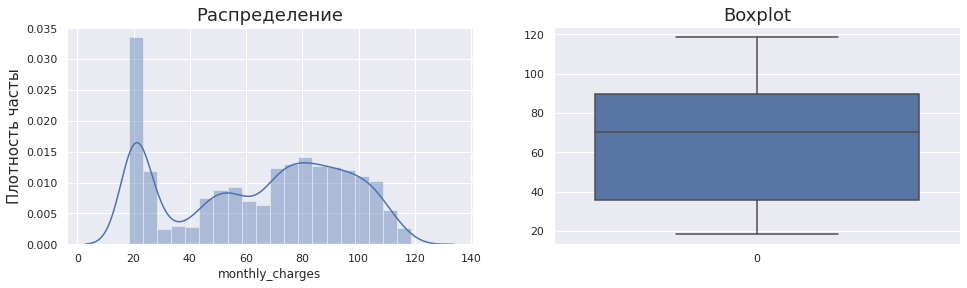

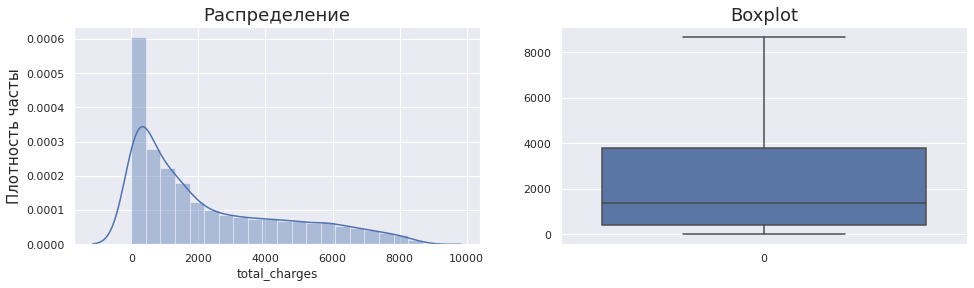

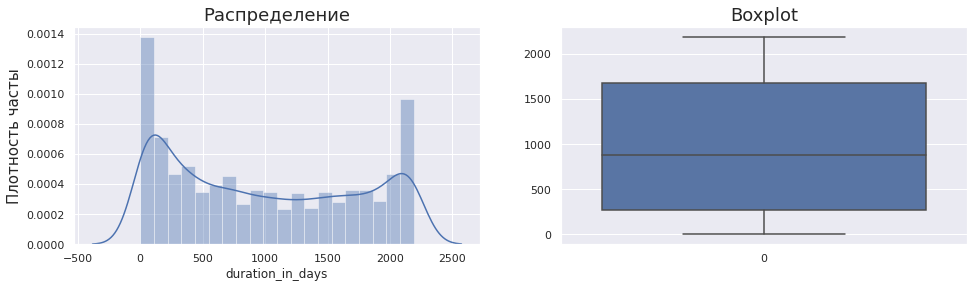

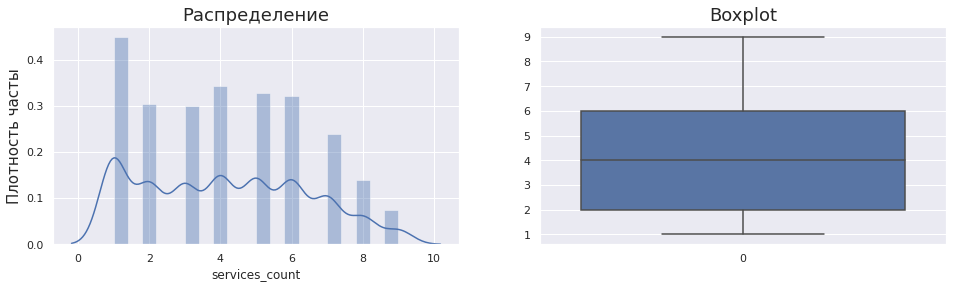

In [91]:
show_numeric(data_full)

На основании построенных графиков можно сделать выводы, что:

1) столбец monthly_charges - распределен бимодально, так как есть всплески около 20 и около 80

2) столбец total_charges - Имеет нормальное распределение с положительным смещением

3) столбнец duration_in_days - распределен бимодально, так как есть два всплеска: первый для клиентов, которые пользуются услугами около года, и второй - для клиентов, которые пользуются услугами около 3 лет

4) столeц services_count имеет нормальное распределение

По ящикам boxplot нет никаких аномалий и выбросов.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
принято

#### Корреляция признаков

Посмотрим, как признаки коррелируют между собой, с разделением на тех кто ушел и тех, кто остался. Для этого построим pairplot

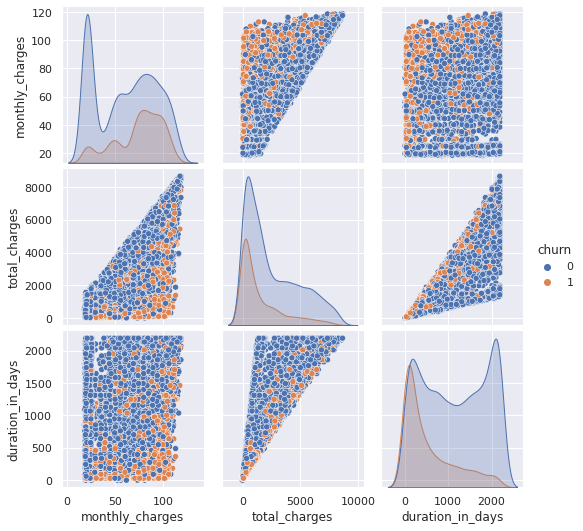

In [92]:
# построение pairplot
sns.pairplot(data_full[['monthly_charges', 'total_charges', 'duration_in_days', 'churn']], hue='churn')
plt.show()

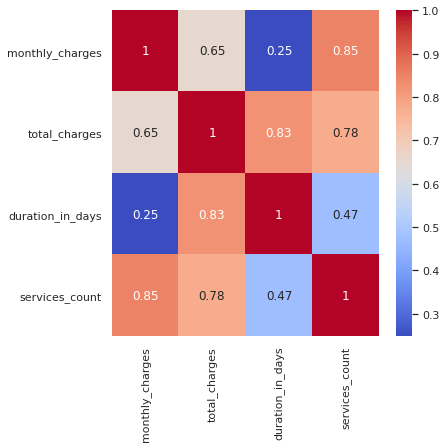

In [93]:
# построим график корреляции признаков
plt.figure(figsize=(6, 6))
sns.heatmap(data_full[['monthly_charges', 'total_charges', 'duration_in_days', 'services_count']].corr(), annot=True, cmap='coolwarm')
plt.show()

На основе построенных графиков можно сделать выводы:

1) по столбцу monthly_charges - видно, что уходят в основном те, кто получает большие счета за услуги

2) столбец total_сharges показывает, что суммарная стоимость одинаково влияет на решение уйти или остаться.

3) по столбцу duration_in_days видно, что уходят в основном в первые месяцы пользования тарифом, в отличие от тех, кто остается к компании


По карте корреляции видно, что сильно коррелируют duration_in_days и total_charges, и чуть слабее monthly_charges и total_charges. И в том , и в другом случае зависимости линейные. 

Поэтому на мой взгляд при таких высоких коэффициентах логичнее для обучения модели удалить столбец total_charges, так как при сильных корреляциях могут возникнуть проблемы при обучении моделей

#### Анализ влияния категориальных и количественных пизнаков на уход клиента

В данном разделе посмотрим, как те или иные категориальные или количественные признаки влияют на решение клиента отказаться от услуг компании.

In [94]:
# напишем функцию для построения графика влияния признака на уход клиента
def categorical_churn(data, column):
    """
    Функция, которая строит график влияния признака на уход клиента
    """
    colors = ['#33cc33', '#cc3300']
    data_churn = data.groupby([column,'churn']).size().unstack()

    ax = (data_churn.T * 100.0 / data_churn.T.sum()).T.plot(kind='bar', 
                                                            width = 0.3,
                                                            stacked = True,
                                                            rot = 0, 
                                                            figsize = (10,6),
                                                            color = colors)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='best',prop={'size':14},title = 'churn')
    ax.set_ylabel('Процент пользователей',size = 14)
    ax.set_title(f'Churn by {column}',size = 14)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), 
                    color = 'white', 
                    weight = 'bold',
                    size = 14)

In [95]:
# разделим признаки на категориальные и количественные
categorical_features, quantitative_features = [], []

for column in data_full.columns:
    if data_full[column].dtype == 'object':
        categorical_features.append(column)
    else:
        quantitative_features.append(column)

In [96]:
# из количественных признаков удалим признак churn, так как это целевой признак
# удалим ненужные для исследования признаки: begin_date, end_date_date
#  также удалим признаки senior_citizen так как это категориальные признаки и добавим  его в categorical_features
#  и customer_id, nd_date в categorical_features, так как этот признак не подойдет для анализа
quantitative_features.remove('churn')
quantitative_features.remove('senior_citizen')
quantitative_features.remove('begin_date')
quantitative_features.remove('end_date_date')
categorical_features.remove('customer_id')
categorical_features.remove('end_date')

In [97]:
# добавление в категориальный признак
categorical_features.append('senior_citizen')

In [98]:
# категориальные признаки
categorical_features

['gender',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'phone_lines',
 'user_type',
 'senior_citizen']

In [99]:
# количественные признаки
quantitative_features

['monthly_charges', 'total_charges', 'duration_in_days', 'services_count']

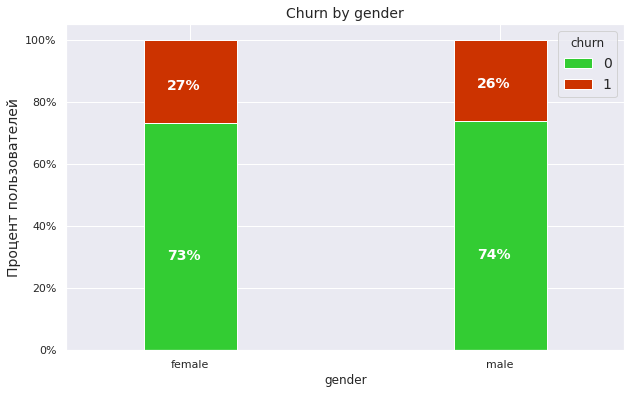

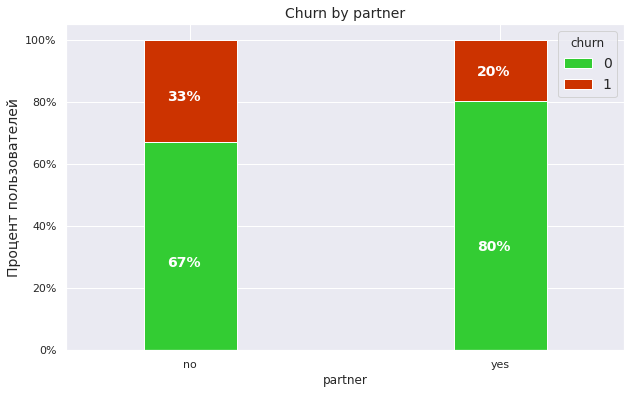

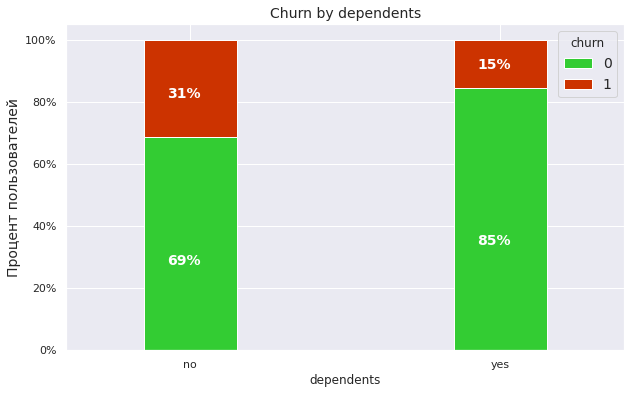

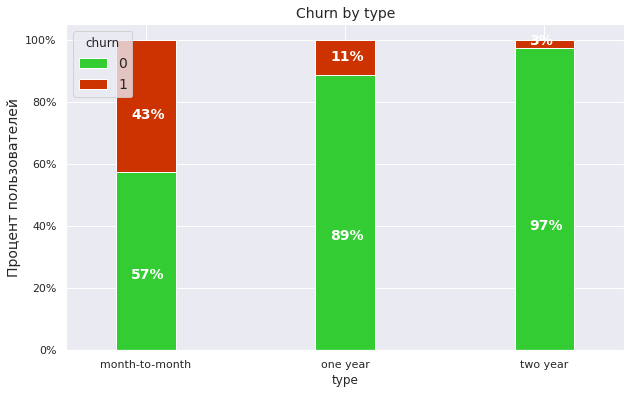

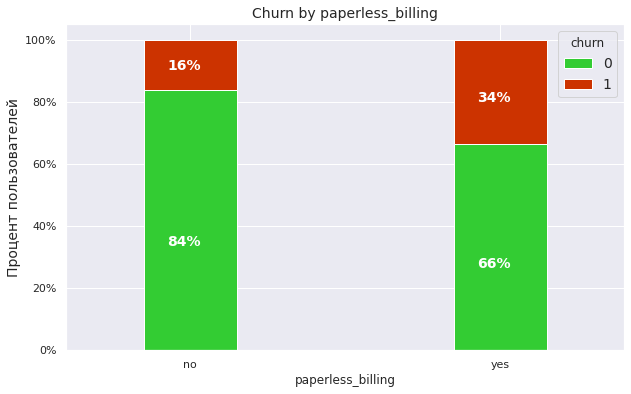

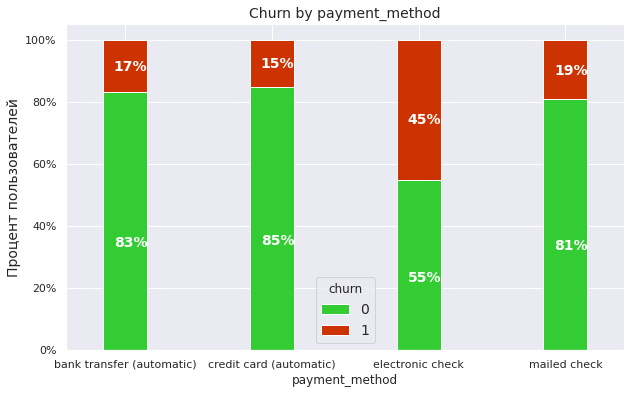

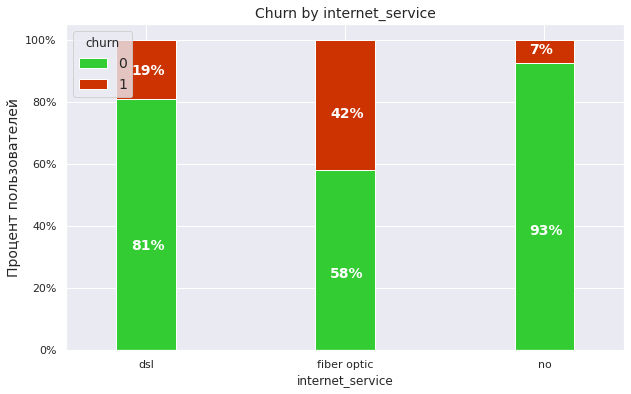

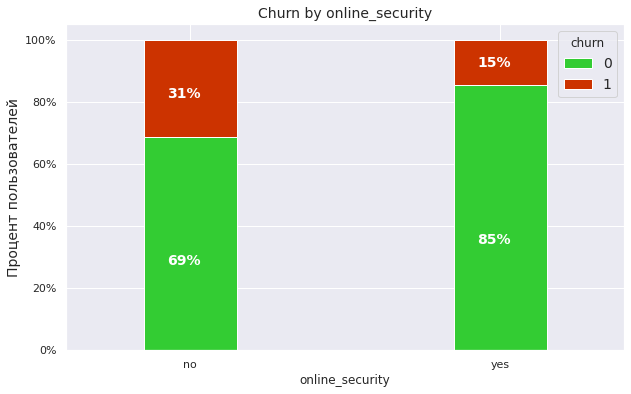

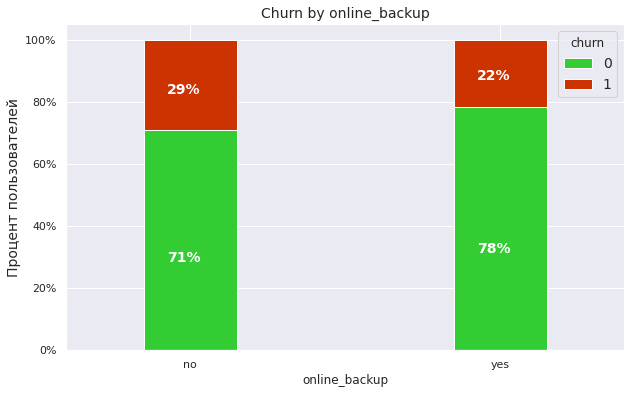

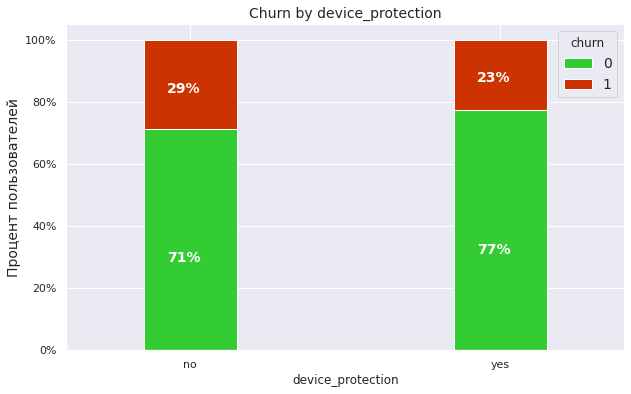

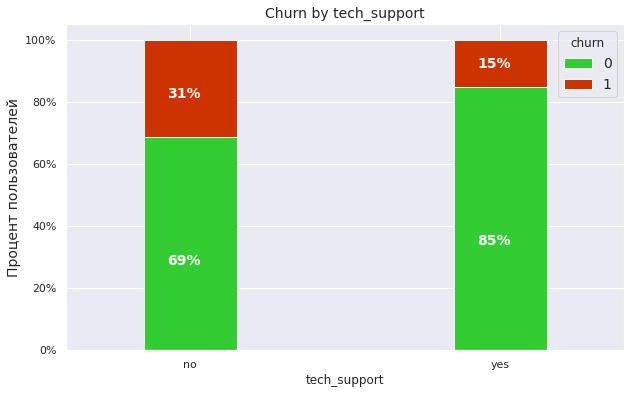

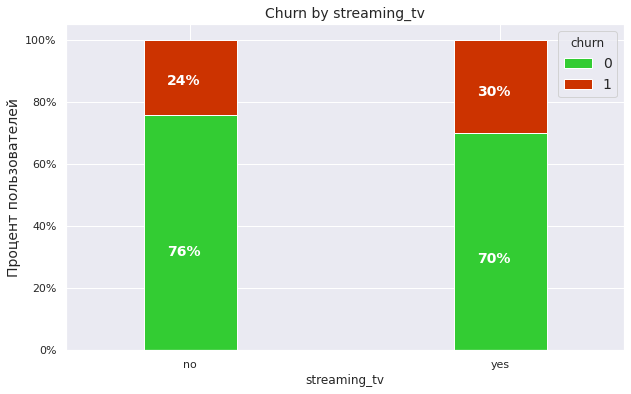

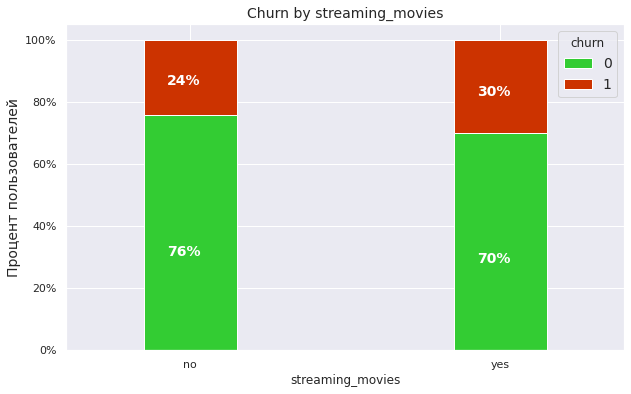

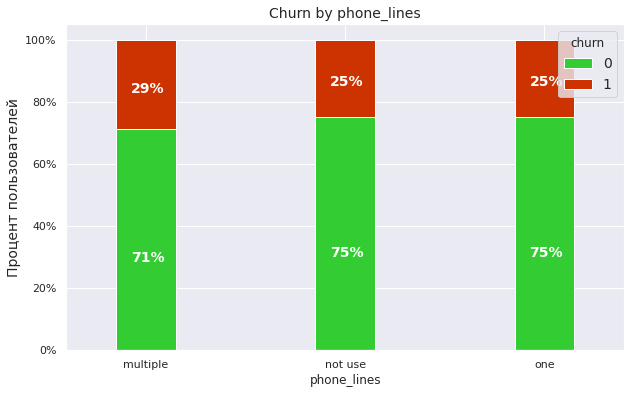

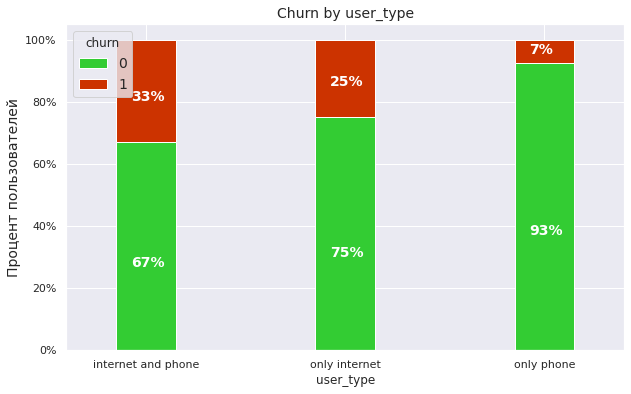

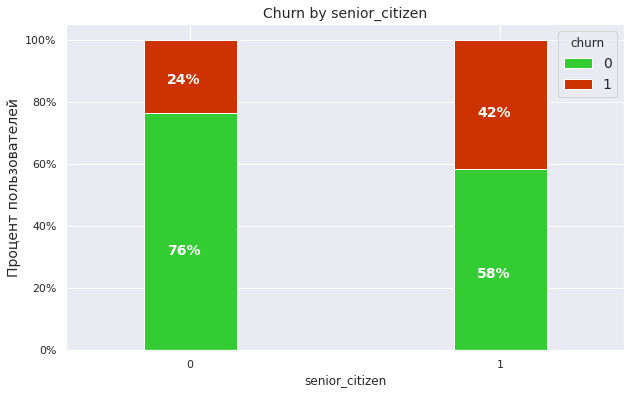

In [100]:
# построим графики
for column in categorical_features:
    categorical_churn(data_full, column)

In [101]:
# напишем функцию для построения графиков по количественным признакам
def quantitative_churn(data, column):
    """
    Функция, которая позволяет строить график для количественных признаков
    """
    plt.figure(figsize = (14, 6))
    sns.distplot(data[column], label='all', bins=80, color='green')
    sns.distplot(data[data['churn'] == 1][column], label='churn', bins=80, color='darkblue')
    plt.title(f'Распределение по {column}', fontsize=20)
    plt.legend()

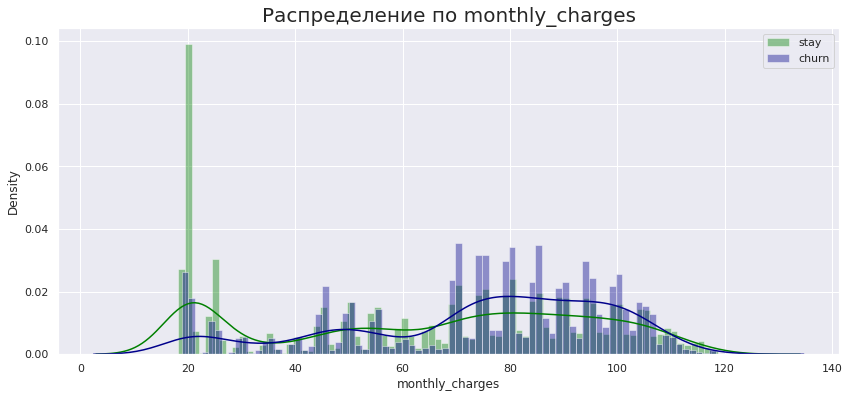

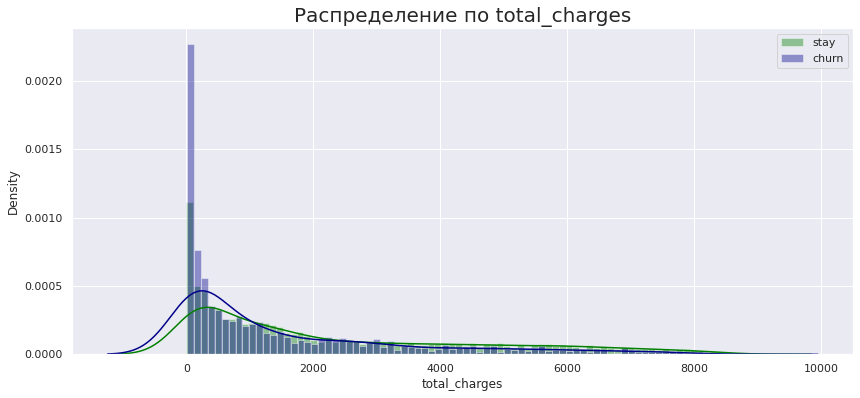

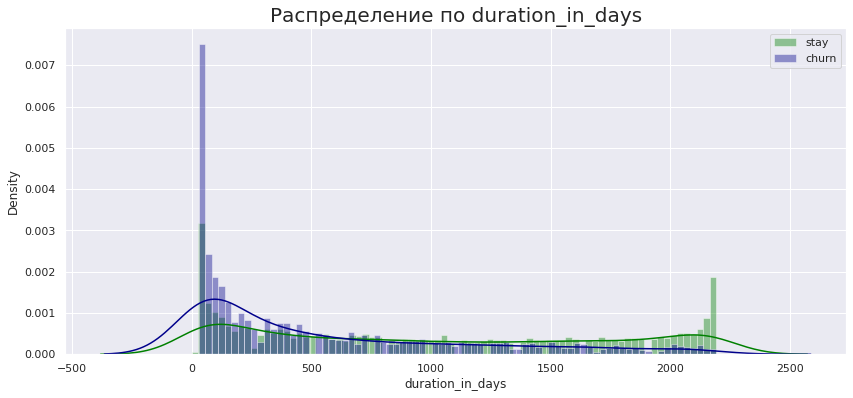

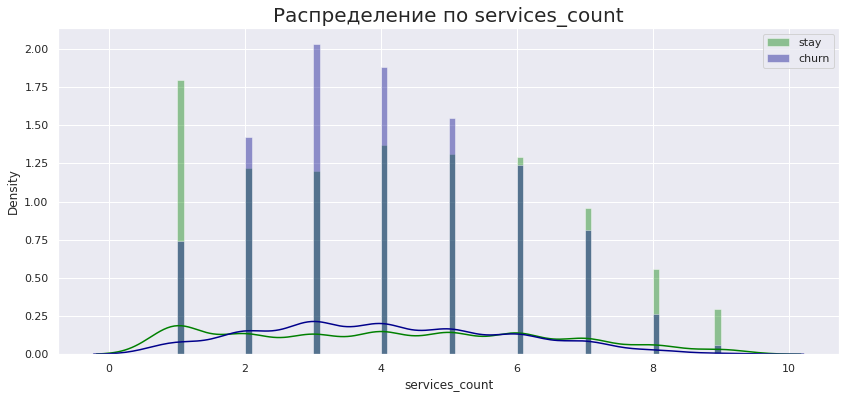

In [102]:
# построим графики
for column in quantitative_features:
    quantitative_churn(data_full, column)

In [103]:
# приведем для количественных признаков их описание
for column in quantitative_features:
    print(column)
    print()
    print(data_full[column].describe())
    print()
    print('-' * 30)

monthly_charges

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

------------------------------
total_charges

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64

------------------------------
duration_in_days

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: duration_in_days, dtype: float64

------------------------------
services_count

count    7043.000000
mean        4.146244
std         2.312720
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: services_count, dtype: float64

---------------

**Вывод:**

1) по признаку gender можно сказать, что данный признак не влияет на решение клиента уйти в завиисмоти от пола. И мужчины, и женщины ведут себя одинаково: доля тех, кто остается 73%, тех, кто уходит - 27%

2) по признаку partner можно отметить, что этот признак оказывает влияние на решение клиента уйти. Так, чаще уходят те, у кого нет партнера - 33%, а среди тех, у кого есть парнер, доля ушедших составляет всего 20%

3) по признаку dependents тоже видна зависимость. Чаще уходят клиенты, у которых нет иждевенцев, их доля составляет 31%. При этом доля ушедших среди тех, у кого есть иждивенцы составляет 15%

4) по признаку type также прослеживается зависисмость. Если у клиента периодичность month-to-month, то доля ушедших составляет 43%, при этом, если у клиента долгосрочный контракт, и он производит оплату за 1 или 2 года, то доля ушедших клиентов составляет 11% и 3% соответственно. Ну это и логично, если оплачиваешь долгосрочный контракт, то будешь пользоваться услугами. Возможно, это какие-то корпоративные клиенты, поэтому при данном типе оплаты клиенты надежнее

5) по признаку paperless_billing можно увидеть зависимость. Доля ушедших клиентов для тех, кто получает электронные счета составляет 34%, а доля ушедших для тех, кто таким способом счета не получает составляет 16%. Возможно, в компании есть пролемы с онлайн выставлением счетов, что приводит к оттоку клиентов

6) по признаку payment_method можно увидеть зависимость, причем она очень похожа на предыдущий признак, и все-таки указывает на проблемы в выставлении счетов онлайн. Так как доля ушедших клиентов, при методу оплаты electronic check составляет 45%, при этом, использование других способов оплаты негативных эмоций у клиентов не вызывает. Доля ушедших при использовании bank transfer - 17%, creadit card - 15%, mailed check - 19%

7) по признаку internet services видна зависисмоть. Чаще уходя клиенты, у которых тип соединения fiber optic, их доля составляет 42%. Реже уходят те, у кого dsl, их доля - 19%

8) по признаку online security также видна зависимость. Чаще уходят люди, у которых не подключена online security, их доля составляет 31%, а доля ушедших для тех, у кото подключена составляет - 15%

9) по признаку online backup выявлена незначительная зависимость, доли ушедшх клиентов для тех, у кого не подключено и подключено различаются немного: 29% и 22% соответственно

10) по признаку device_protection также выявлена незачительная зависимость, доля ушедших, среди тех, у кого не подключена данная опция составляет 29%, а среди тех, у кого подключено - 23%

11) наличие tech support также оказывает влияние на решение клиента уйти. Чаще уходят клиенты, у которых данныя опция не подключена - 31%, а у кого она подключена, доля ушедших составляет - 15%. На мой взгляд, здесь такая зависисмоть объяснима, так как если возникают какие-то проблемы, и нет тех поддержки, то этот фактор вызывает негативные эмоции. И у меня тут возникает вопрос, почему такая важная опция не предоставляется по умолчанию. Возможно, ее наличие, помогло бы сохранить часть клиентов

12) по признакам streaming_tv и streaming_movie зависмость ухода клиента от наличия данной опции так же прослеживается. ЧАще уходят те, у кого эта опция подключена - 30%, реже те, у кого не подключена - 24%. Возможно, это связано с увеличением стоимости услуг

13) по признаку phone_lines зависимость не прослеживается. Примерно одинаково уходят клиенты и с нексколькими линиями (29%)б и с одной линией (25%), и даже те, кто не пользуется услугами телефонии (25%)

14) по признаку user_type - типы используемых услуг (телефония, интернет) видна зависимость: чаще уходят те, кто пользуется услугами и телефонии, и интернета, их доля составляет 33%, реже уходят те, кто использует только интернет - 25%, и практически не уходят те, кто используют телефонию

15) по признаку senior_citizen чаще уходят пенсионеры, их доля составляет 42%, реже не пенсионеры - 24%

16) по признаку monthly_charges можно сказать, что чаще уходят клиенты, у которых ежемесячный платеж более 70. Среднее значение ежемесячного платежа - 64. По данному признаку:

    - среднее значение - 64
    - медиана - 70
    - межквартильный размах от 35 до 89
    
17) по признаку total_charges чаще уходят те, у кого меньше общая сумма платежа, по графику это значение меньше 800. Это и логично, если клиент не долго по времени пользуется услугами, то и общий платеж будет меньше. Среднее значение - 1397. По данному признаку:

    - среднее значение - 2283
    - медиана - 1397
    - межквартильный размах от 401 до 3794
    
18) по признаку duration_in_days можно сказать, что чаще уходят клиенты, которые пользуются услугами меньше года. Более надежны те, кто пользуются услугами более 3хлет. Среднее значение - 986. По данному признаку:

    - среднее значение - 986
    - медиана - 883
    - межквартильный размах от 273 до 1676
    
19) по признаку services_count можно сказать, что чаще уходят люди, у которых от 2 до 5 услуг включительно. Среднее значение 4. Реже уходят те, у кого 1 или от 6 до 9 услуг включительно. По данному признаку:

    - среднее значение - 4
    - медиана - 4
    - межквартильный размах от 2 до 6

### Вывод

В ходе выполнения данного раздела:

1) были созданы дополнительные столбцы, которые помогли получить больше информации о клиентах:

     - duration_in_days - количество дней, в течение которых клиент использует услуги
     - services_count - количество используемых услуг
     - user_type - типы услуг, которые использует клиент
     
2) получили основные характеристики клиентов компании:

     - среди клиентов одинаковое количество женщин и мужчин, примерно 50 на 50
     - также примерно одинаковое количество клиентов, у которых есть партнер
     - преобладают клиенты, которые не являются пенсионерами. Доля таких клиентов 83%
     - у большинства клиентов (70%) также нет иждивенцев
     - чаще выбирается периодичность оплаты: month-to-month (55%), реже - two year (24%)
     - по способу оплаты лидирует electronic check (33,6%), при этом в ходе анализа определили, что клиенты из данной категории чаще уходят
     - чаще уходят те, кто получают большие ежемесячные счета за услуги около 70, при том, что средний ежемесячный платеж составляет 64
- чаще уходят клиенты, которые пользуются услугами меньше года
     - также чаще уходят клиенты, у которых количество услуг от 2 до 5 включительно
     - по карте корреляции видно, что сильно коррелируют duration_in_days и total_charges, и чуть слабее monthly_charges и total_charges. И в том, и в другом случае зависимости линейные. 
     
3) можно составить портрет клиента, который потенциально может уйти:

    - не пенсионер
    - не важно какого он пола
    - использует интернет и телефонию
    - без услуги тех.поддержки
    - без online security
    - использующий в качестве подключения к интернету fiber optic
    - использующий в качестве способа оплаты electronic check
    - счета ему выставляется online
    - с периодичностью оплаты month-to-month
    - без иждивенцев
    - без партнера
    - являющийся клиентом менее года
    - ежемесячный платеж составляет более 70
    - имеющий от 2 до 5 услуг
    
4) также хотелось бы отметить, что в ходе анализа была выявлена проблема, которая оказывает значительно влияние на решение клиента об уходе: это electrinic check и online выставление счетов. Возможно, в данных сервисах у заказчика существуют проблемы, которые влияют на лояльность клиента. Также значимым фактором при принятии решения об уходе для клиента, является отсутствие опции тех поддержка по умолчанию.

## Подготовка данных

В данном разделе:

1) создадим дополнительные признаки, исходя из проведенного анализа

2) удалим ненужные для обучения столбцы

3) разделим выборку на обучающую и тестовую

4) перекодируем категориальные признаки, отмасштабируем количественные признаки

5) избавимся от дисбаланса классов в обучающей выборке

### Создание дополнительных признаков

В ходе проведенного исследовательского анализа, мы пришли к выводу, что можно создать дополнительные признаки, которые помогут модели понять, уйдет клиент или нет. Предлагаю создать признак: 

    - vip_client: клиента, который платит 89 и является клиентом компании более 365 дней. Как мы выяснили для клиентов, важен ежемесячный платеж, и чем он больше, тем больше вероятность, что клиент уйдет. А также клиенты чащу уходят, если пользуются услугами меньше года. Поэтому тех, кто готов платить больше и пользоваться услугами больше года можно отнести к особой группе клиентов. Вероятность того, что они уйдут мала 

In [104]:
# выделим третий квантиль, граница вше которой платят незначительное количество клиентов
quantile_3 =  data_full['monthly_charges'].quantile(.75)
quantile_3

89.85

In [105]:
# создадим функцию для определения вип клиента
def vip_client(row):
    """
    Функция, которая заполняет столбец с вип-клиентами
    """
    monthly_charges = row['monthly_charges']
    duration_in_days = row['duration_in_days']

    if monthly_charges > quantile_3 and duration_in_days > 365:
        return 'yes'

    return 'no'

In [106]:
# применим указанную функцию
data_full['vip_client'] = data_full.apply(vip_client, axis=1)

In [107]:
data_full.head()

,customer_id,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,...,tech_support,streaming_tv,streaming_movies,phone_lines,churn,end_date_date,duration_in_days,services_count,user_type,vip_client
0,7590-vhveg,female,0,yes,no,2020-01-01,no,month-to-month,yes,electronic check,...,no,no,no,not use,0,2020-02-01,31,2,only internet,no
1,5575-gnvde,male,0,no,no,2017-04-01,no,one year,no,mailed check,...,no,no,no,one,0,2020-02-01,1036,4,internet and phone,no
2,3668-qpybk,male,0,no,no,2019-10-01,2019-12-01 00:00:00,month-to-month,yes,mailed check,...,no,no,no,one,1,2019-12-01,61,4,internet and phone,no
3,7795-cfocw,male,0,no,no,2016-05-01,no,one year,no,bank transfer (automatic),...,yes,no,no,not use,0,2020-02-01,1371,4,only internet,no
4,9237-hqitu,female,0,no,no,2019-09-01,2019-11-01 00:00:00,month-to-month,yes,electronic check,...,no,no,no,one,1,2019-11-01,61,2,internet and phone,no


Для дальнейшего обучения модели нам не понадобся некоторые столбцы, так как никакой смысловой нагрузки они не несут:

    - customer_id
    - begin_date
    - end_date
    - end_date_date
    - total_charges - этот столбец мы решили удалить на этапе проверки корреляции признаков, так как он может мешать модели обучаться, и в целом какой-то смысловой нагрузки не несет, так как логично, что чем больше ежемесячный платеж и срок использования услуг, тем больше будет этот показатель. Для модели признаки duration_in_days и monthly_charges дадут достаточно информации

In [108]:
# удаляем ненужные столбцы
data_full = data_full.drop(['customer_id', 'begin_date', 'end_date', 'end_date_date', 'total_charges'], axis=1)

In [109]:
# выводим общую информацию
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   object 
 3   dependents         7043 non-null   object 
 4   type               7043 non-null   object 
 5   paperless_billing  7043 non-null   object 
 6   payment_method     7043 non-null   object 
 7   monthly_charges    7043 non-null   float64
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  phone_lines        7043 non-null   object 
 16  churn              7043 

In [110]:
# разделим признаки на категориальные и количественные
categorical_features, quantitative_features = [], []

for column in data_full.columns:
    if data_full[column].dtype == 'object':
        categorical_features.append(column)
    else:
        quantitative_features.append(column)

In [111]:
# категориальные признаки
categorical_features

['gender',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'phone_lines',
 'user_type',
 'vip_client']

In [112]:
# количественные признаки
quantitative_features

['senior_citizen',
 'monthly_charges',
 'churn',
 'duration_in_days',
 'services_count']

In [113]:
# из количественных признаков удалим признак churn, так как это целевой признак
#  также удалим признаки senior_citizen так как это категориальный признак и добавим его в categorical_features
quantitative_features.remove('churn')
quantitative_features.remove('senior_citizen')

In [114]:
# количественные признаки
quantitative_features

['monthly_charges', 'duration_in_days', 'services_count']

In [115]:
# добавляем признак senior_citizen в категориальные признаки
categorical_features.append('senior_citizen')

In [116]:
# категориальные признаки
categorical_features

['gender',
 'partner',
 'dependents',
 'type',
 'paperless_billing',
 'payment_method',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'phone_lines',
 'user_type',
 'vip_client',
 'senior_citizen']

In [117]:
# выведем общий датасет
data_full.head()

,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,phone_lines,churn,duration_in_days,services_count,user_type,vip_client
0,female,0,yes,no,month-to-month,yes,electronic check,29.85,dsl,no,...,no,no,no,no,not use,0,31,2,only internet,no
1,male,0,no,no,one year,no,mailed check,56.95,dsl,yes,...,yes,no,no,no,one,0,1036,4,internet and phone,no
2,male,0,no,no,month-to-month,yes,mailed check,53.85,dsl,yes,...,no,no,no,no,one,1,61,4,internet and phone,no
3,male,0,no,no,one year,no,bank transfer (automatic),42.30,dsl,yes,...,yes,yes,no,no,not use,0,1371,4,only internet,no
4,female,0,no,no,month-to-month,yes,electronic check,70.70,fiber optic,no,...,no,no,no,no,one,1,61,2,internet and phone,no


### Кодирование и масштабирование признаков

Для кодирования категориальных признаков воспользуемся методом OHE кодирования для категориальных признаков

In [118]:
# проведем OHE кодирование с учетом дамми-ловушки
data_ohe = pd.get_dummies(data_full, columns=categorical_features, drop_first=True)
data_ohe.head()

,monthly_charges,churn,duration_in_days,services_count,gender_male,partner_yes,dependents_yes,type_one year,type_two year,paperless_billing_yes,...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,phone_lines_not use,phone_lines_one,user_type_only internet,user_type_only phone,vip_client_yes,senior_citizen_1
0,29.85,0,31,2,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,56.95,0,1036,4,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,53.85,1,61,4,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,42.30,0,1371,4,1,0,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
4,70.70,1,61,2,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [119]:
# разделим данные на признаки(features) и целевой признак (target)
features_ohe = data_ohe.drop(['churn'], axis=1)
target_ohe = data_ohe['churn']

Разделим выборку на обучающую и тестовую в соотношении 4:1

In [120]:
# разделение выборки
features_train, features_test, target_train, target_test = train_test_split(features_ohe, 
                                                                            target_ohe, 
                                                                            train_size=0.8, 
                                                                            random_state=250722)

In [121]:
# проверяем размер выборок
print(f'Размер обучающей выборки: {features_train.shape}, размер целевого признака: {target_train.shape}') 
print(f'Размер тестовой выборки: {features_test.shape}, размер целевого признака: {target_test.shape}')

Размер обучающей выборки: (5634, 26), размер целевого признака: (5634,)
Размер тестовой выборки: (1409, 26), размер целевого признака: (1409,)


Проведем масштабирование количественных признаков. При этом будем масштабировать отдельно обучающую и тестовую выборки

In [122]:
# масштабирование выборок
scaler = StandardScaler()
scaler.fit(features_train[quantitative_features])

features_train[quantitative_features] = scaler.transform(features_train[quantitative_features])
features_test[quantitative_features] = scaler.transform(features_test[quantitative_features])

In [123]:
features_train.head()

,monthly_charges,duration_in_days,services_count,gender_male,partner_yes,dependents_yes,type_one year,type_two year,paperless_billing_yes,payment_method_credit card (automatic),...,device_protection_yes,tech_support_yes,streaming_tv_yes,streaming_movies_yes,phone_lines_not use,phone_lines_one,user_type_only internet,user_type_only phone,vip_client_yes,senior_citizen_1
4244,-1.486564,0.560311,-1.355235,1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1179,0.987190,0.438162,0.812679,1,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,1
2621,0.482816,1.583147,1.246262,1,1,0,0,1,1,1,...,1,1,1,1,0,1,0,0,0,0
2567,1.035304,1.130790,0.812679,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
5388,-1.481587,-1.278645,-1.355235,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [124]:
# проверим распределение классов в датасете, обучающей и тестовой выборке
print('Распределение классов в датасете:') 
print(data_ohe['churn'].value_counts(normalize=True))
print()
print('Распределение классов в тренировочной выборке:') 
print(target_train.value_counts(normalize=True)) 
print()
print('Распределение классов в тестовой выборке:')
print(target_test.value_counts(normalize=True))

Распределение классов в датасете:
0    0.73463
1    0.26537
Name: churn, dtype: float64

Распределение классов в тренировочной выборке:
0    0.732517
1    0.267483
Name: churn, dtype: float64

Распределение классов в тестовой выборке:
0    0.74308
1    0.25692
Name: churn, dtype: float64


Распределение классов в тестовой похоже на распределение классов в датасете, поэтому будем использовать полученные выборки для обучения моделей. Но, на мой взгляд, нужно еще поработать с балансом классов в обучающей выборке, для того, чтобы модель лучше обучалась, так как не все классификаторы могут работать с несбалансированными классами (в ходе подготовки проекта, тестировала и без балансирования классов, метрики были значительно хуже)

In [125]:
# напишем функцию для апсемплирования
def upsample(features, target, repeat):
    """
    Функция, осуществляющая апсемплирование обучающей выборки
    """

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    repeat = repeat
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=250722)
    
    return features_upsampled, target_upsampled

In [126]:
# применим функцию только к обучающей выборке и выведем размер выборки
features_train_ups, target_train_ups = upsample(features_train, target_train, 3)

print(features_train_ups.shape)
print(target_train_ups.shape)

(8648, 26)
(8648,)


In [127]:
# проверим распределение классов
print('Распределение классов в датасете:') 
print(data_ohe['churn'].value_counts(normalize=True))
print()
print('Распределение классов в тренировочной выборке:') 
print(target_train_ups.value_counts(normalize=True)) 
print()
print('Распределение классов в тестовой выборке:')
print(target_test.value_counts(normalize=True))

Распределение классов в датасете:
0    0.73463
1    0.26537
Name: churn, dtype: float64

Распределение классов в тренировочной выборке:
1    0.52278
0    0.47722
Name: churn, dtype: float64

Распределение классов в тестовой выборке:
0    0.74308
1    0.25692
Name: churn, dtype: float64


Как видим, классы в обучающей выборке стали сбалансированны.

На данном этапе мы сделали все необхожимые преобразования. Приступим к обучению и тестированию моделей.

### Вывод

В ходе выполнения данного раздела мы:

1) создали дополнительный признак vip_client, который поможет модели определять надежных клиентов

2) удалили столбцы: 

    - customet_id
    - begin_date
    - end_date
    - end_date_date
    - total_charges
    
3) произвели кодирование методом OHE категориальный признаков и масштабирование количественных признаков

4) сбалансировали классы на обучающей выборке

Данные готовы, можно приступить к обучению и тестированию моделей

## Обучение и тестирование моделей

В данном разделе:

1) обучим модели с подбором гиперпараметров:

    - LogisticRegression
    - RandomForestClassifier
    - CatBoostClassifier
    - LGBMClassifier
    
2) рассчитаем:

    - accuracy
    - presicion
    - recall
    - f1 мера
    - AUC-ROC
    
3) построим ROC-кривую и матрицу ошибок

4) замерим время обучения и предсказания

5) выберем наилучшую модель

Напишем функцию подбора гиперпараметров. Будем использовать GridSearchCV

In [128]:
def best_params(model, params, features_train, target_train):
    """ 
    Функция, возвращающая наилучшие параметры модели    
    """   
    grid = GridSearchCV(model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1)
    grid.fit(features_train, target_train)
    
    print('Лучшая оценка на валидации: ', grid.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid.best_params_)
    print('Лучшая модель: ', grid.best_estimator_)

    return grid.best_params_

Напишем функцию для расчета необходимых значений, построения графика и матриц

In [129]:
def test_scoring(model, features_train, features_test, target_train, target_test):
    """
    Функция расчета показателей, построения графика и матрицы ошибок
    """
    start_time = time.time()
    model.fit(features_train,target_train)
    first_time = time.time() - start_time
    
    start_time = time.time()
    pred_proba_test = model.predict_proba(features_test)[:, 1]
    pred_test = model.predict(features_test)
    second_time = time.time() - start_time
    
    accuracy = round(model.score(features_test, target_test), 3)
    presicion = round(precision_score(target_test, pred_test), 3)
    recall = round(recall_score(target_test, pred_test), 3)
    f1_mera = round(f1_score(target_test, pred_test), 3)
    auc_roc = round(roc_auc_score(target_test, pred_proba_test), 3)

    print(f'Accuracy: {accuracy}')
    print(f'Presicion: {presicion}' )
    print(f'Recall: {recall}')
    print(f'f1_мера: {f1_mera}')
    print(f'AUC-ROC: {auc_roc}')
    print(f'Время обучения: {round(first_time, 3)}')
    print(f'Время предсказания: {round(second_time, 3)}')
    
    fpr, tpr, thresholds = roc_curve(target_test, pred_proba_test)

    sns.set()
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr)

    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('ROC-кривая')
    plt.show()
    
    print('Матрица ошибок')
    plot_confusion_matrix(model, features_test, target_test)
    
    return round(first_time, 2), round(second_time, 2), accuracy, presicion, recall, f1_mera, auc_roc

Нашла информацию и подумала, что будет интересно посмотреть на то, какие признаки модель выделяет в качестве важных. Попробуем реализовать этот механизм. Напишем функцию для ранжирования признаков при обучении модели. Сделаем 2 функции: для классификаторов и для регрессии, так как в регресии не используется метод feature_importances_

In [130]:
# напишем функцию для ранжирования признаков модели классификаторы
def features_important_classifier(model):
    """
    Функция, которая ранжируют признаки, оказывающие наибольшее влияние на модели классификаторы    
    """
    importances = model.feature_importances_
    weights = []
    for i, v in enumerate(importances):
        weights.append(v)

    feature_importances = pd.DataFrame({'features' : list(features_ohe.columns), 
                                    'weights' : weights}).sort_values(by='weights', ascending=False)

    sns.set(font_scale = 5)
    sns.set(color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(25, 20)
    sns.barplot(x=feature_importances['weights'], y=feature_importances['features'], data=feature_importances, color='lightgreen')
    plt.xlabel('Важность', fontsize=25, weight = 'bold')
    plt.ylabel('Признаки', fontsize=25, weight = 'bold')
    plt.title('Важность признаков', fontsize=25, weight = 'bold')
    plt.show()

In [131]:
# напишем функцию для ранжирования признаков модель регрессия
def features_important_regression(model):
    """
    Функция, которая ранжирует признаки, оказываеющие наибольшее влияние на модель регрессии
    """
    weights = model.coef_
    abs_weights = np.abs(weights)

    feature_importances = pd.DataFrame({'features' : list(features_ohe.columns),
                                        'weights' : abs_weights[0]}).sort_values(by='weights', ascending=False)
    sns.set(font_scale = 5)
    sns.set(color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(25,20)
    sns.barplot(x=feature_importances['weights'], y=feature_importances['features'], data=feature_importances, color='lightgreen')
    plt.xlabel('Важность', fontsize=25, weight = 'bold')
    plt.ylabel('Признаки', fontsize=25, weight = 'bold')
    plt.title('Важность признаков', fontsize=25, weight = 'bold')
    plt.show()

### Подбор гиперпараметров

#### LogisticRegression

Настраиваемые гиперпараметры:

    - коэффициент регуляции С - необходим для ограничения роста весов при признаках

In [132]:
lr = LogisticRegression(random_state=250722, n_jobs=-1)
lr_param = {'C' : np.linspace(0.001, 10, 20)}

lr_best_params = best_params(lr, lr_param, features_train_ups, target_train_ups)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшая оценка на валидации:  0.8430469204332709
Лучшие гиперпараметры модели на валидации:  {'C': 0.5272631578947369}
Лучшая модель:  LogisticRegression(C=0.5272631578947369, n_jobs=-1, random_state=250722)


#### RandomForestClassifier

Настраиваемые гиперпараметры:

    - n_estimators - количество решающих деревьев
    - max_depth - максимальная глубина дерева
    - min_samples_leaf - минимальное количество примеров для образования листа
    - min_sample_split - минимальное количество примеров, требуемых для конечного узла

In [133]:
rf = RandomForestClassifier(random_state=250722, n_jobs=-1)
rf_param = {'n_estimators': [300, 500, 1000],
            'max_depth': [None, 10, 15],
            'min_samples_leaf': np.arange(1, 6, 2),
            'min_samples_split': np.arange(2, 7, 2)}

rf_best_params = best_params(rf, rf_param, features_train_ups, target_train_ups)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Лучшая оценка на валидации:  0.9789977593794486
Лучшие гиперпараметры модели на валидации:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Лучшая модель:  RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=250722)


#### CatBoostClassifier

Настраиваемые гиперпараметры:

    - n_estimators - количество решающих деревьев
    - learning_rate - коэффициент шага антиградиента
    - max_depth - максимальная глубина дерева
    - l2_leaf_reg - коэффициент при l2 регуляции

In [134]:
catboost = CatBoostClassifier(random_state=250722, verbose=0)
catboost_param = {'n_estimators': [300, 500, 1000],
                  'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [1, 5, 9],
                  'l2_leaf_reg': [1, 3]}

catboost_best_params = best_params(catboost, catboost_param, features_train_ups, target_train_ups)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Лучшая оценка на валидации:  0.9875225611321141
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x7fbf2bb253a0>


#### LGBMClassifier

Настраиваемые гиперпараметры:

    - n_estimators - количество решающих деревьев
    - learning_rate - коэффициент шага антиградиента
    - max_depth - максимальная глубина дерева

In [135]:
lgbm = lgb.LGBMClassifier(n_jobs=-1, random_state=250722)
lgbm_param = {'n_estimators': [300, 500, 1000],
                  'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [1, 5, 9]}

lgbm_best_params = best_params(lgbm, lgbm_param, features_train_ups, target_train_ups)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшая оценка на валидации:  0.9861531871922942
Лучшие гиперпараметры модели на валидации:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
Лучшая модель:  LGBMClassifier(max_depth=9, n_estimators=1000, random_state=250722)


###  Обучение и тестирование моделей

#### LogisticRegression

Accuracy: 0.74
Presicion: 0.497
Recall: 0.818
f1_мера: 0.618
AUC-ROC: 0.852
Время обучения: 0.495
Время предсказания: 0.094


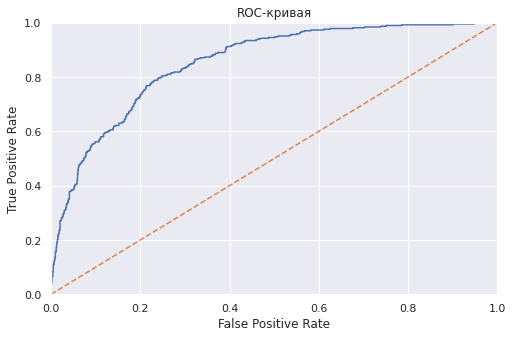

Матрица ошибок


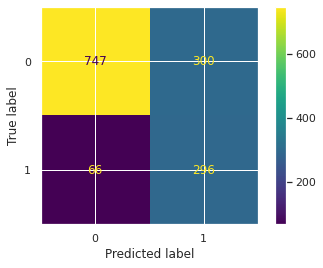

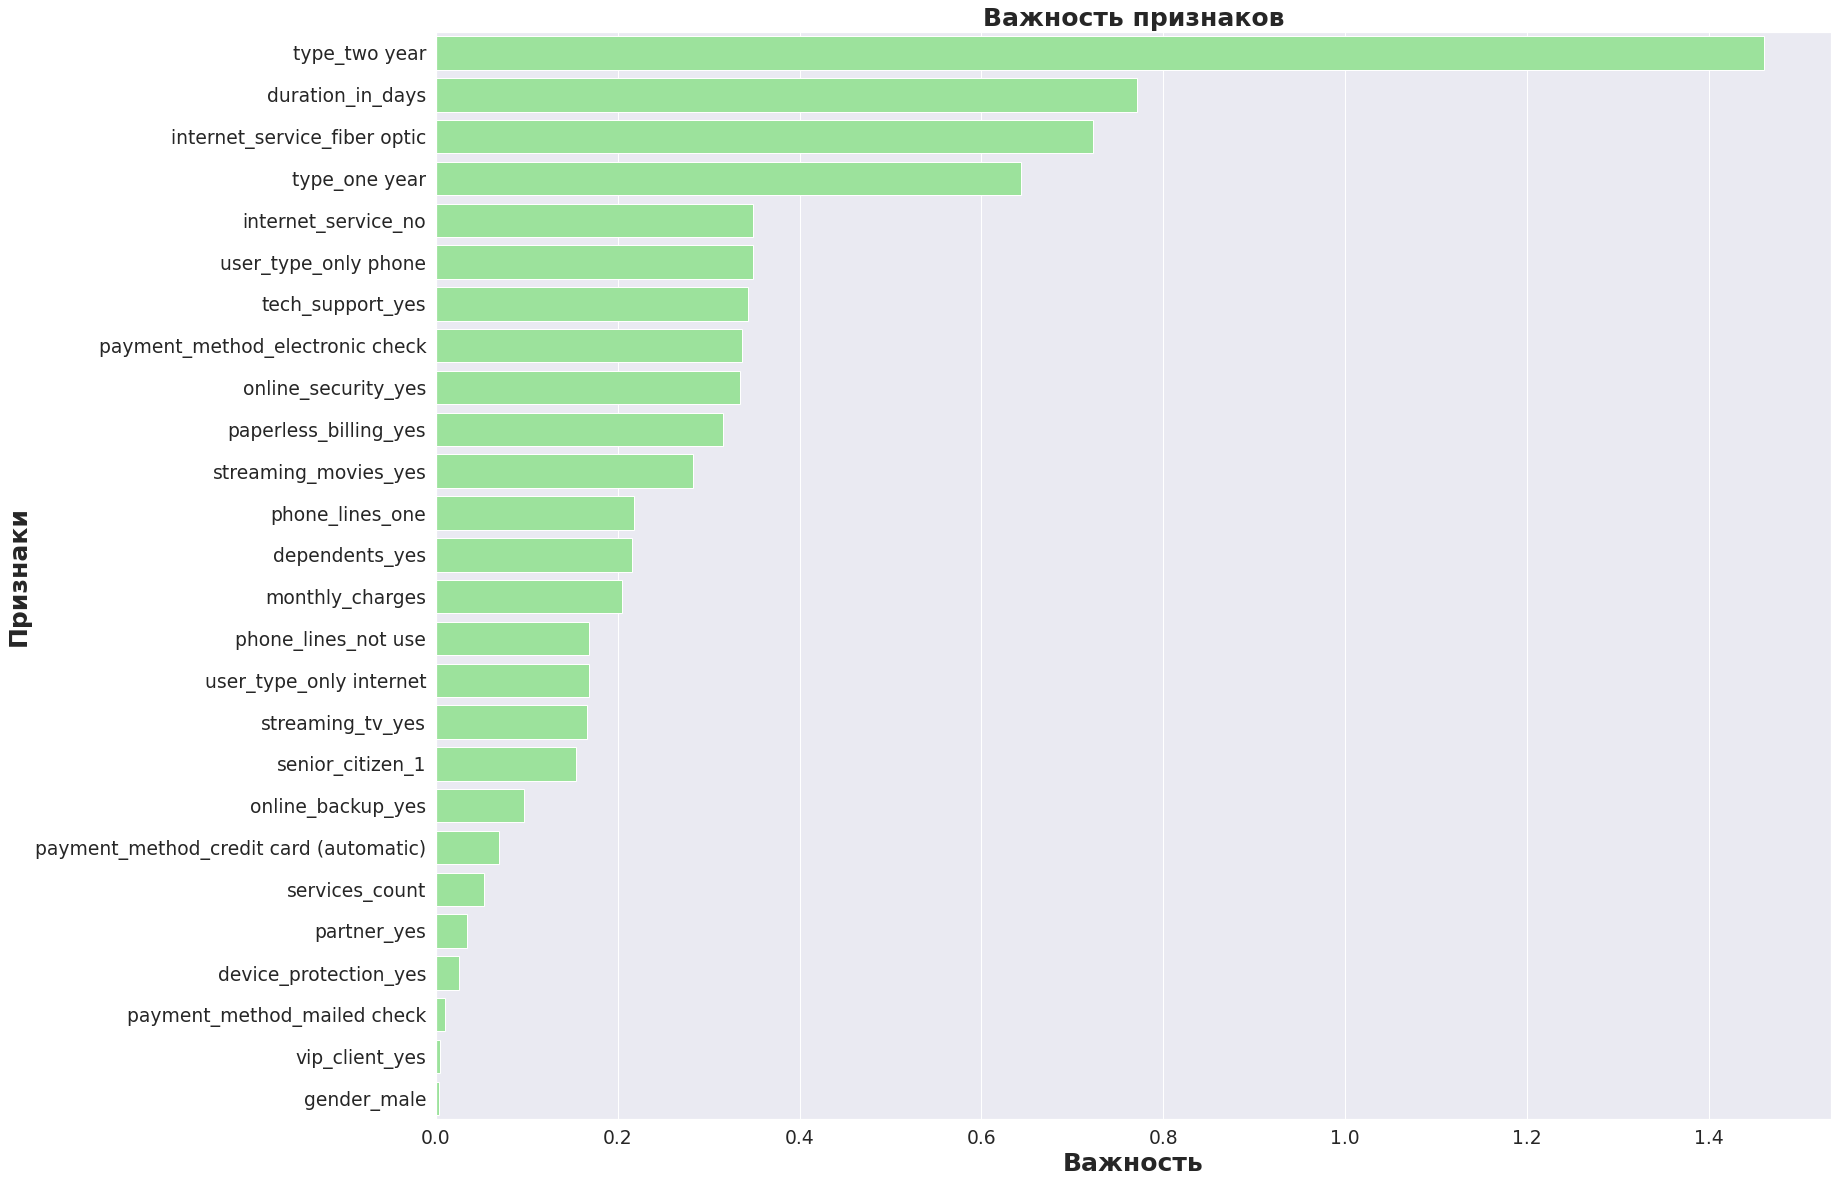

In [136]:
lr_model = LogisticRegression(**lr_best_params, random_state=250722, n_jobs=-1)
lr_test = test_scoring(lr_model, features_train_ups, features_test, target_train_ups, target_test)
features_important_regression(lr_model)

#### RandomForestClassifier

Accuracy: 0.802
Presicion: 0.618
Recall: 0.602
f1_мера: 0.61
AUC-ROC: 0.841
Время обучения: 7.125
Время предсказания: 0.673


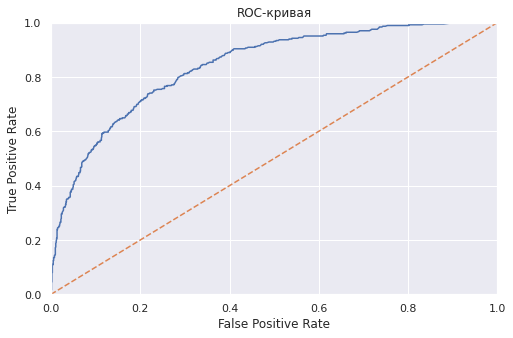

Матрица ошибок


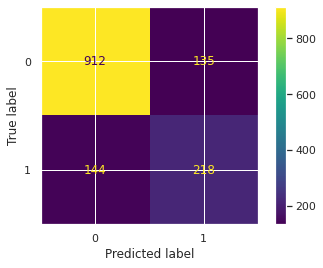

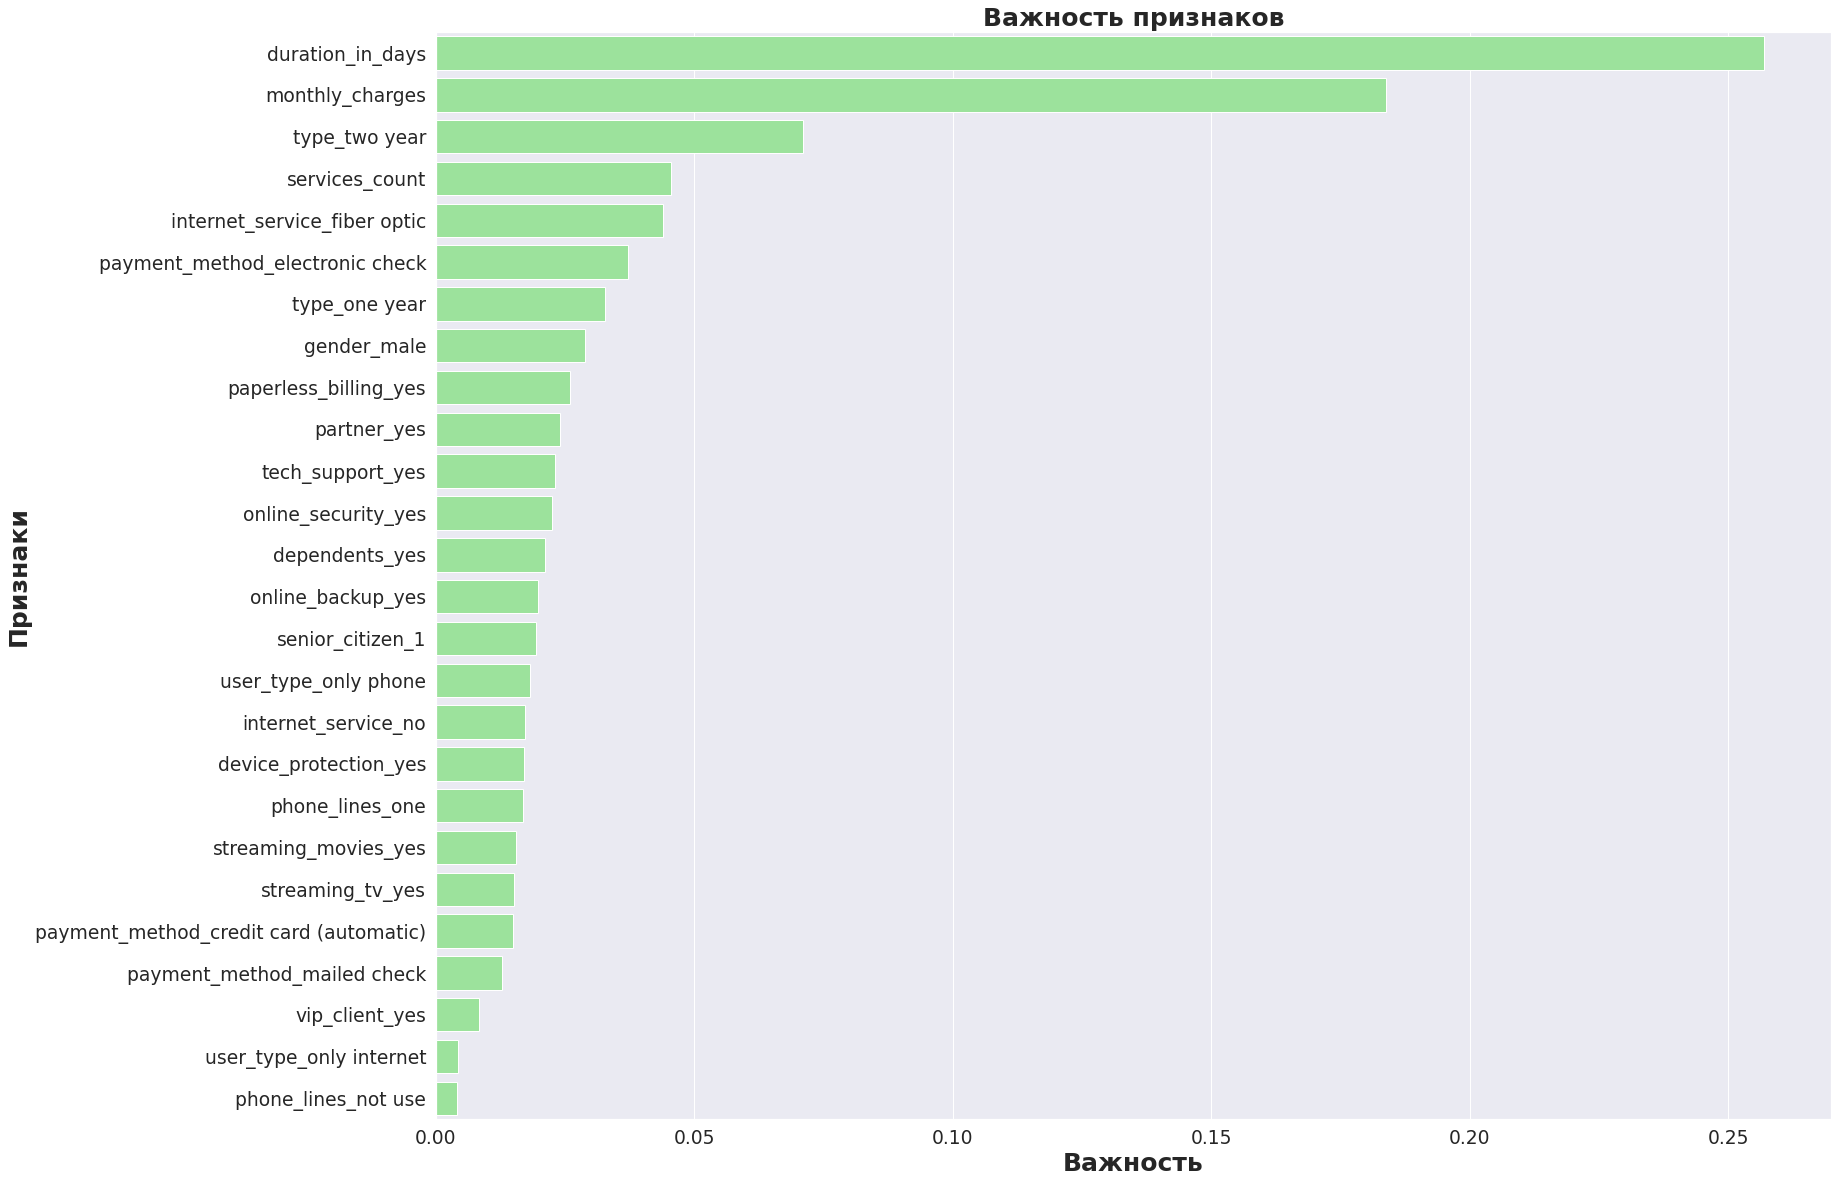

In [137]:
rf_model = RandomForestClassifier(**rf_best_params, random_state=250722, n_jobs=-1)
rf_test = test_scoring(rf_model, features_train_ups, features_test, target_train_ups, target_test)
features_important_classifier(rf_model)

#### CatBoostClassifier

Accuracy: 0.85
Presicion: 0.729
Recall: 0.663
f1_мера: 0.695
AUC-ROC: 0.899
Время обучения: 13.528
Время предсказания: 0.013


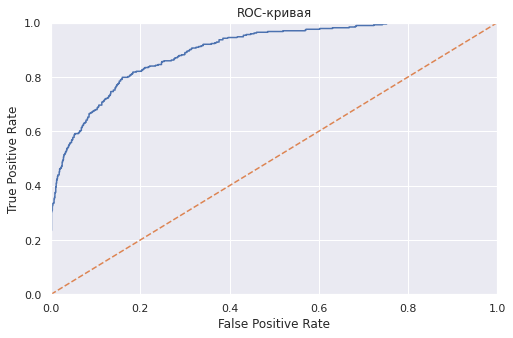

Матрица ошибок


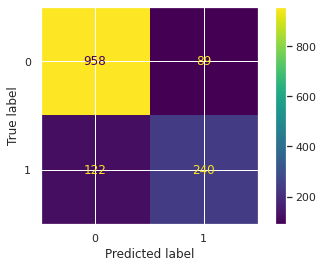

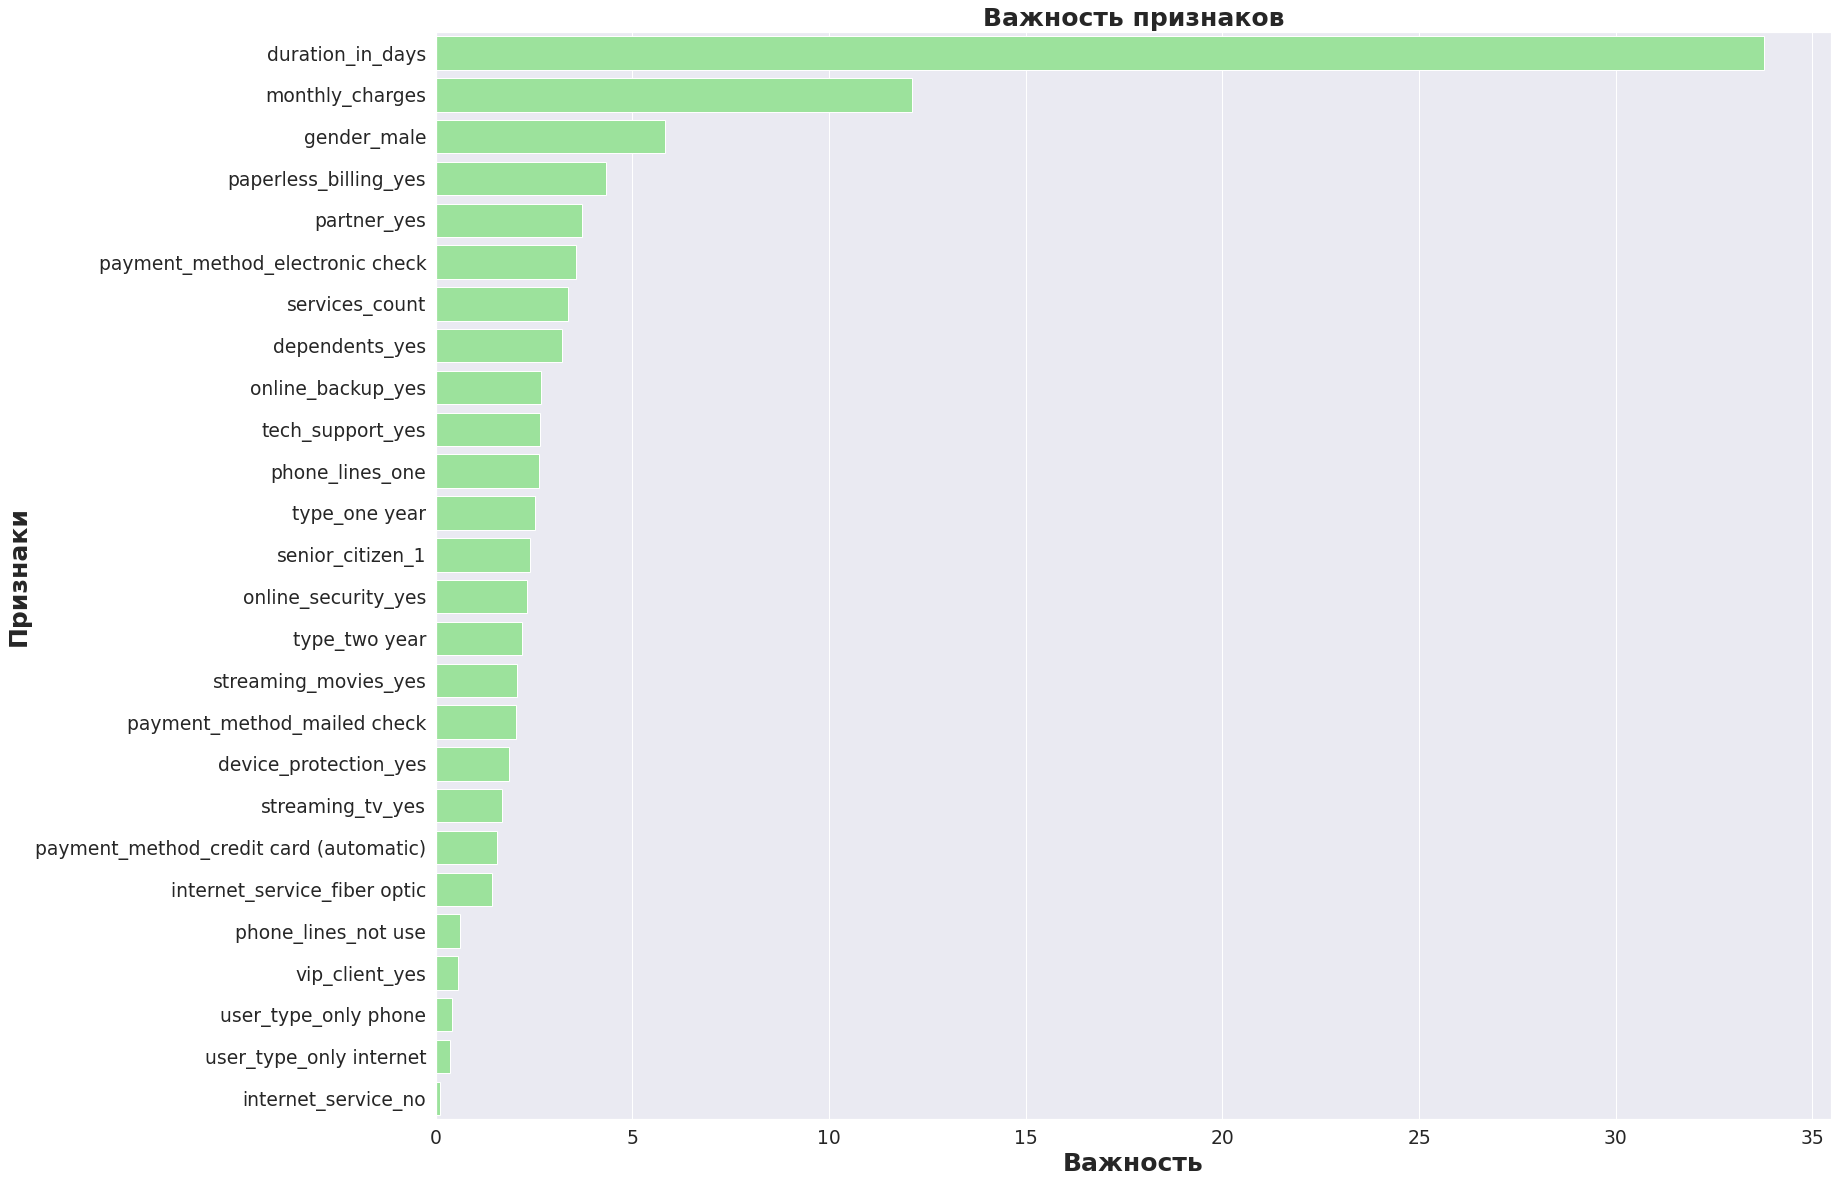

In [138]:
catboost_model = CatBoostClassifier(**catboost_best_params, random_state=250722, verbose=0)
catboost_test = test_scoring(catboost_model, features_train_ups, features_test, target_train_ups, target_test)
features_important_classifier(catboost_model)

#### LGBMClassifier

Accuracy: 0.864
Presicion: 0.75
Recall: 0.704
f1_мера: 0.726
AUC-ROC: 0.914
Время обучения: 8.259
Время предсказания: 0.49


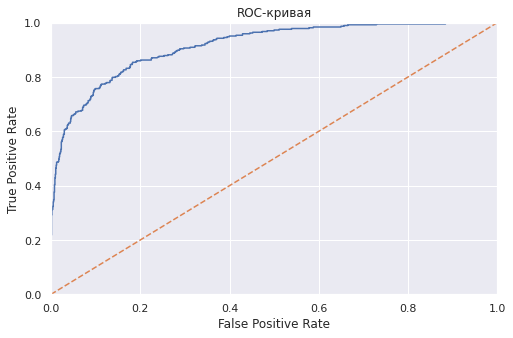

Матрица ошибок


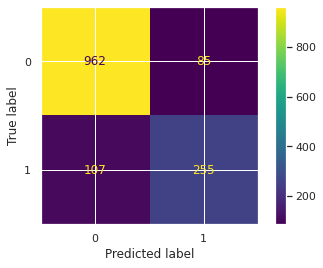

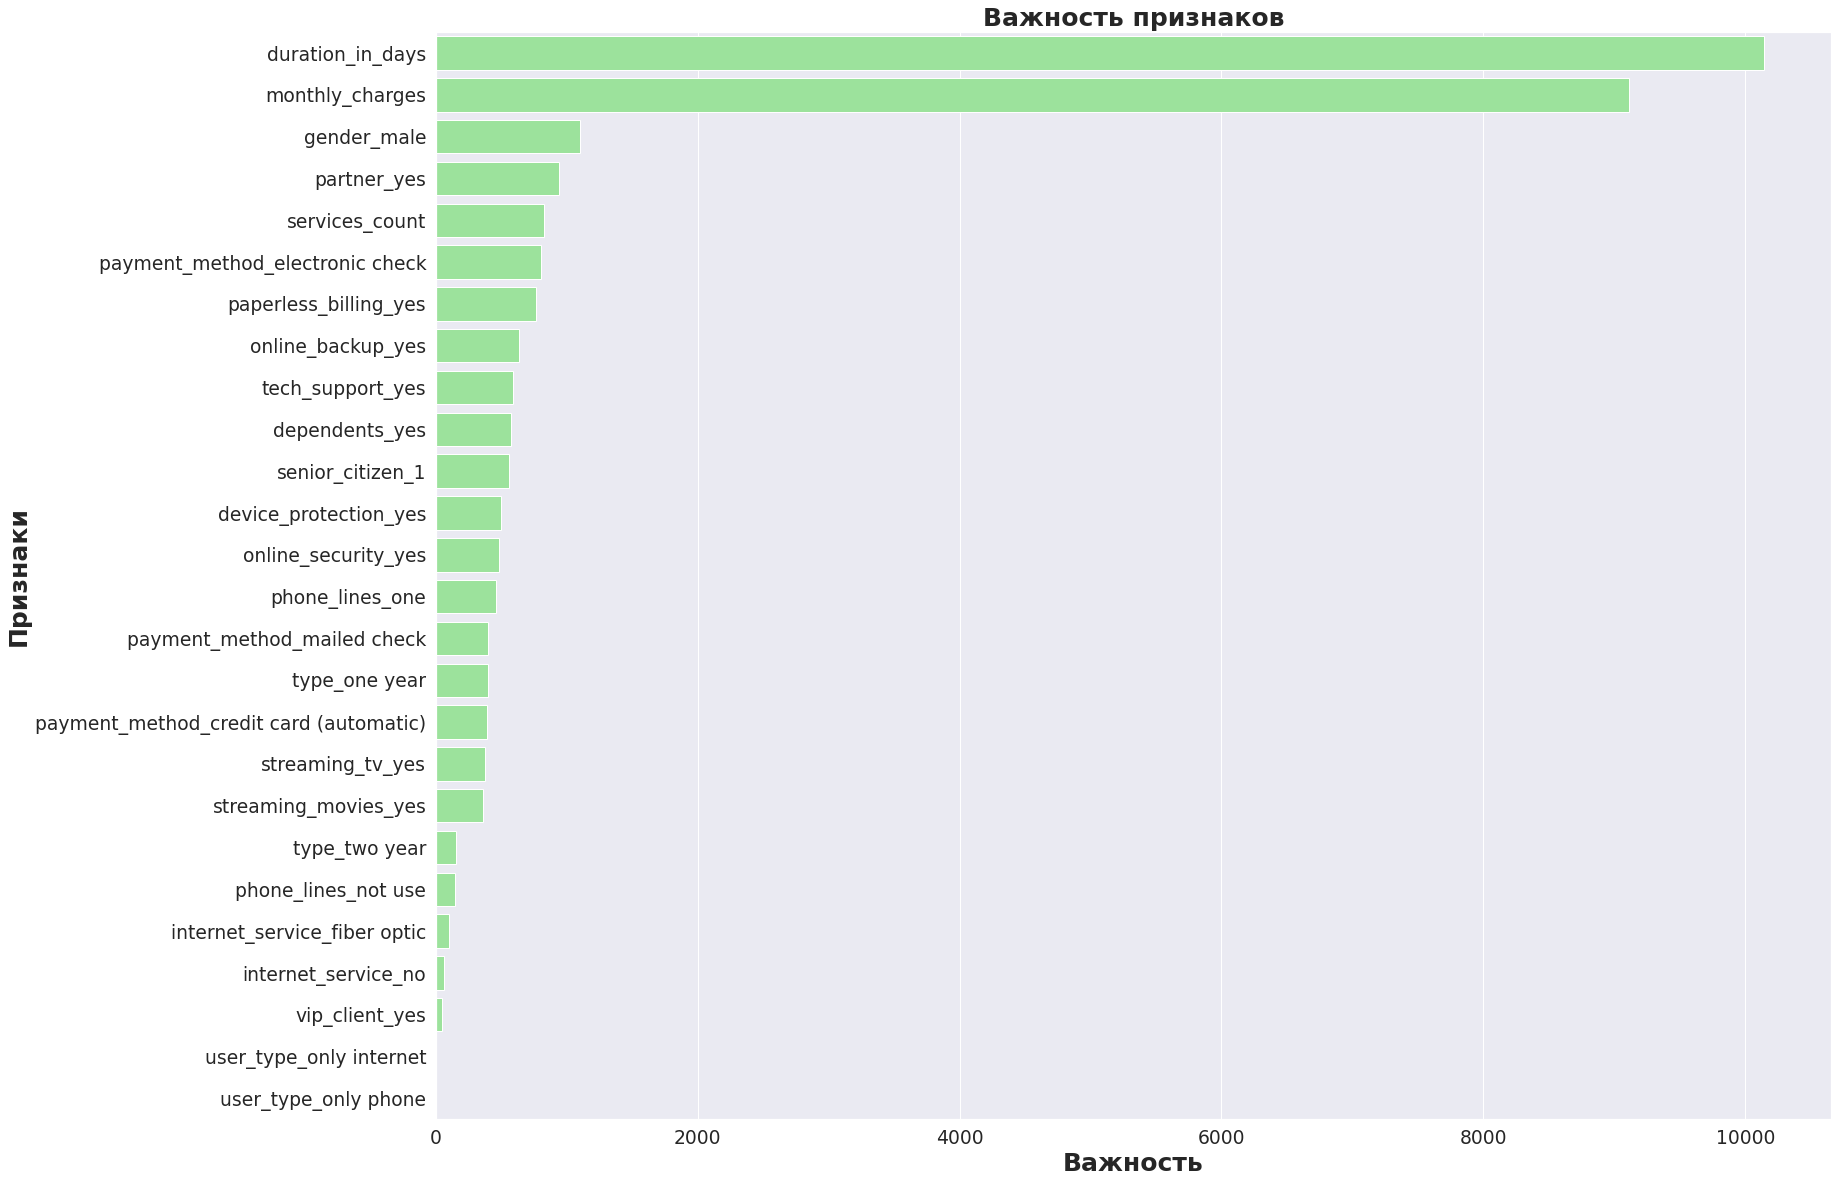

In [139]:
lgbm_model = lgb.LGBMClassifier(**lgbm_best_params, n_jobs=-1, random_state=250722)
lgbm_test = test_scoring(lgbm_model, features_train_ups, features_test, target_train_ups, target_test)
features_important_classifier(lgbm_model)

In [140]:
# выведем всю информацию в табличной форме
models_test = pd.DataFrame([lr_test, rf_test, catboost_test, lgbm_test],
                     columns=['Время обучения', 'Время предсказания', 'Accuracy', 'Presicion', 'Recall', 'f1-мера', 'AUC-ROC'],
                      index=['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier', 'LGBMClassifier']
                     )

In [141]:
models_test

,Время обучения,Время предсказания,Accuracy,Presicion,Recall,f1-мера,AUC-ROC
LogisticRegression,0.49,0.09,0.740,0.497,0.818,0.618,0.852
RandomForestClassifier,7.13,0.67,0.802,0.618,0.602,0.610,0.841
CatBoostClassifier,13.53,0.01,0.850,0.729,0.663,0.695,0.899
LGBMClassifier,8.26,0.49,0.864,0.750,0.704,0.726,0.914


Таким образом, на данный момент лучшей моделью, с достаточно высокой **AUC-ROC = 0.914**, accuracy = 0.864 является модель LGBMClassifier с гиперпараметрами {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 8.259 и предсказанием 0.49.

Также хорошо показала себя модель CatBoostClassifier, с достаточно высокой **AUC-ROC = 0.899**, accuracy = 0.85  с гиперпараметрами {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 13.8 и предсказанием 0.012.

Наиболее быстрой моделью по времени обучения и предсказания является LogisticRegression  с гиперпараметрами {'C': 0.5272631578947369}: 0.356 и 0.089 соответственно. Но значение **AUC-ROC = 0.852**, accuracy - 0.74 значительно ниже, чем у LGBMClassifier, CatBoostClassifier.

Кроме того, LGBMClassifier ошибается с ушедшими клиентами в 25% случаев, тогда как LogisticRegression в 48% случаев.

#### Вывод

В ходе обучения и тестирования моделей получили:

1) были обучены 4 модели:

    - LogisticRegression
    - RandomForestClassifier
    - CatBoostClassifier
    - LGBMClassifier
    
2) в ходе обучения и тестирования **LogisticREgression** были получены следующие показатели:

    - метрики:
    
        - accuracy - 0.74
        - presicion - 0.497
        - recall - 0.818
        - f1-мера - 0.618
        - **AUC-ROC - 0.852**
        - время обучения - 0.356
        - время предсказания - 0.089
        
     - по матрице ошибок видно, 71% пользователей, которые остались предсказаны правильно. Из всех ушедших удалось поймать 81%. 49% из тех кого определяем как уходящего, действительно уходят, то есть с ушедшими ошибаемся в 49% случаев.
     
     - выделим топ-7 важных признаков модели:
     
         1) type_two_year
         2) duration_in_days
         3) internet_service_fiber_optic
         4) type_one_year
         5) internet_service_no
         6) user_type_only_phone
         7) tech_support_yes
         
      - лучшие гиперпараметры: {'C': 0.5272631578947369}
      
3) в ходе обучения и тестирования **RandomForestClassifier** были получены следующие показатели:

    - метрики:
    
        - accuracy - 0.802
        - presicion - 0.618
        - recall - 0.602
        - f1-мера - 0.61
        - AUC-ROC - **0.841**
        - время обучения - 7.542
        - время предсказания - 0.696
        
     - по матрице ошибок видно, 87% пользователей, которые остались предсказаны правильно. Из всех ушедших удалось поймать 60%. 62% из тех кого определяем как уходящего, действительно уходят, то есть с ушедшими ошибаемся в 38% случаев.
     
     - выделим топ-7 важных признаков модели:
     
         1) duration_in_days
         2) monthly_charges
         3) type_two_year
         4) services_count
         5) internet_services_fiber_optic
         6) payment_method_electronic_check
         7) type_one_year
         
      - лучшие гиперпараметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
      
4) в ходе обучения и тестирования **CatBoostClassifier** были получены следующие показатели:

    - метрики:
    
        - accuracy - 0.85
        - presicion - 0.729
        - recall - 0.663
        - f1-мера - 0.695
        - **AUC-ROC - 0.899**
        - время обучения - 13.803
        - время предсказания - 0.012
        
     - по матрице ошибок видно, 91% пользователей, которые остались предсказаны правильно. Из всех ушедших удалось поймать 66%. 73% из тех кого определяем как уходящего, действительно уходят, то есть с ушедшими ошибаемся в 27% случаев.
     
     - выделим топ-7 важных признаков модели:
     
         1) duration_in_days
         2) monthly_charges
         3) gender_male
         4) paperless_billing_yes
         5) payment_method_electronic_check
         6) services_count
         7) dependents_yes
         
      - лучшие гиперпараметры: {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}
      
5) в ходе обучения и тестирования **LGBMClassifier** были получены следующие показатели:

    - метрики:
    
        - accuracy - 0.864
        - presicion - 0.75
        - recall - 0.704
        - f1-мера - 0.726
        - **AUC-ROC - 0.914**
        - время обучения - 8.259
        - время предсказания - 0.49
        
     - по матрице ошибок видно, 92% пользователей, которые остались предсказаны правильно. Из всех ушедших удалось поймать 70%. 75% из тех кого определяем как уходящего, действительно уходят, то есть с ушедшими ошибаемся в 25% случаев.
     
     - выделим топ-7 важных признаков модели:
     
         1) duration_in_days
         2) monthly_charges
         3) gender_male
         4) partner_yes
         5) services_count
         6) payment_method_electronic_check
         7) paperless_billing_yes
         
      - лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}

Таким образом, на данный момент лучшей моделью, с достаточно высокой **AUC-ROC = 0.914**, accuracy = 0.864 является модель LGBMClassifier с гиперпараметрами {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 8.259 и предсказанием 0.49.

Также хорошо показала себя модель CatBoostClassifier, с достаточно высокой **AUC-ROC = 0.899**, accuracy = 0.85  с гиперпараметрами {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 13.8 и предсказанием 0.012.

Наиболее быстрой моделью по времени обучения и предсказания является LogisticRegression  с гиперпараметрами {'C': 0.5272631578947369}: 0.356 и 0.089 соответственно. Но значение **AUC-ROC = 0.852**, accuracy - 0.74 значительно ниже, чем у LGBMClassifier, CatBoostClassifier.

Кроме того, LGBMClassifier ошибается с ушедшими клиентами в 25% случаев, тогда как LogisticRegression в 48% случаев.
Получаем:

- логистическая регрессия уступает по интересующим нас метрикам качества (Accuracy, AUC-ROC) другим моделям, но выигрывает сильно во времени обучения

- лучшие по качеству метрик модели градиентного бустинга, но у них есть один минус - долгое время обучения

- лучшая модель по оценкам интересующих метрик - LGBMClassifier

- большинство моделей определило следующие признаки наиболее значимыми:

    - monthly_charges    
    - duration_in_days  
    - internet_services_fiber_optic
    - type_one_year
    - services_count


## Общий вывод

Мы рассмотрели данные из четырех файлов: 

    - `contract.csv` — информация о договоре (его размер 7043 строк и 8 колонок);
    - `personal.csv` — персональные данные клиента (его размер 5517 строк и 8 колонок;
    - `internet.csv` — информация об интернет-услугах (его размер 7043 строк и 5 колонок);
    - `phone.csv` — информация об услугах телефонии (его размер 6361 строк и 2 колонки).


1) после предварительного просмотра данных из четырех таблиц  были сделаны выводы: данные в представленных таблицах полные, в них нет пропусков и дубликатов, но после объединения есть пропуски, так как часть пользователей использует только интернет, часть только телефон, а некоторые используют телефон и интернет одновременно. Для дальнейшей корректной работы исправили некоторые неточности (привели названия столбцов к змеиному регистру, привели все данные к нижнему регистру, так как можно совершить ошибку при обращении к данным, кроме того из-за разных регистров могут быть неявные дубликаты, изменили тип столбцов в таблице contract.csv: begin_date на формат datetime, total_charge на формат float. Объединили таблицы. Заполнили пропуски. Таким образом предварительный обзор данных был завершен. Все неточности и пропуски были исправлены. Можем приступать к исследовательскому анализу данных.

2) в ходе проведения работы были созданы дополнительные признаки, которые позволили получить больше информации о клиентах заказчика, и позволили систематизировать некоторые данные: duration_in_days, services_count, user_type, vip_client. На мой взгляд, благодаря созданию дополнительных признаков улучшилось качество моделей. На сырых данных метрика AUC-ROC была не более 0.82.

3) на основании исследовательского анализа данных мы получили портрет клиента заказчика:

     - среди клиентов одинаковое количество женщин и мужчин, примерно 50 на 50
     - также примерно одинаковое количество клиентов, у которых есть партнер
     - преобладают клиенты, которые не являются пенсионерами. Доля таких клиентов 83%
     - у большинства клиентов (70%) также нет иждивенцев
     - чаще выбирается периодичность оплаты: month-to-month (55%), реже - two year (24%)
     - по способу оплаты лидирует electronic check (33,6%), при этом в ходе анализа определили, что клиенты из данной категории чаще уходят
     - чаще уходят те, кто получают большие ежемесячные счета за услуги около 70, при том, что средний ежемесячный платеж составляет 64
     - чаще уходят клиенты, которые пользуются услугами меньше года
     - также чаще уходят клиенты, у которых количество услуг от 2 до 5 включительно
     - по карте корреляции видно, что сильно коррелируют duration_in_days и total_charges, и чуть слабее monthly_charges и total_charges. И в том, и в другом случае зависимости линейные. 
     
4) также на основании исследовательского анализа данных можно составить портрет клиента, который потенциально может уйти:

    - не пенсионер
    - не важно какого он пола
    - использует интернет и телефонию
    - без услуги тех.поддержки
    - без online security
    - использующий в качестве подключения к интернету fiber optic
    - использующий в качестве способа оплаты electronic check
    - счета ему выставляется online
    - с периодичностью оплаты month-to-month
    - без иждивенцев
    - без партнера
    - являющийся клиентом менее года
    - ежемесячный платеж составляет более 70
    - имеющий от 2 до 5 услуг
    
5) хотелось бы отметить, что в ходе анализа была выявлена проблема, которая оказывает значительно влияние на решение клиента об уходе: это electrinic check и online выставление счетов. Возможно, в данных сервисах у заказчика существуют проблемы, которые влияют на лояльность клиента. Также значимым фактором при принятии решения об уходе для клиента, является отсутствие опции тех поддержка по умолчанию.

6) во время подготовки данных для обучения моделей мы:

    - удалили столбцы (customet_id, begin_date, end_date, end_date_date, total_charges
    - произвели кодирование методом OHE категориальный признаков и масштабирование количественных признаков
    - сбалансировали классы на обучающей выборке

7) провели обучение и тестирование 4 моделей:

    - LogisticRegression
    - RabdomForestClassifier
    - CatBoostClassifier
    - LGBMClassifier
     
8) выяснили, что лучшей моделью, с достаточно высокой **AUC-ROC = 0.914**, accuracy = 0.864 является модель LGBMClassifier с гиперпараметрами {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 8.259 и предсказанием 0.49. Она с вероятностью 86.4% может дать правильный прогрноз. Также хорошо показала себя модель CatBoostClassifier, с достаточно высокой **AUC-ROC = 0.899**, accuracy = 0.85  с гиперпараметрами {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000}, временем обучения на 7000 строк - 13.8 и предсказанием 0.012. Наиболее быстрой моделью по времени обучения и предсказания является LogisticRegression  с гиперпараметрами {'C': 0.5272631578947369}: 0.356 и 0.089 соответственно. Но значение **AUC-ROC = 0.852**, accuracy - 0.74 значительно ниже, чем у CatBoostClassifier. Кроме того, LGBMClassifier ошибается с ушедшими клиентами в 25% случаев, тогда как LogisticRegression в 48% случаев.

9) большинство моделей определило следующие признаки наиболее значимыми:

    - monthly_charges    
    - duration_in_days  
    - internet_services_fiber_optic
    - type_one_year
    - services_count

Таким образом, требуемая метрика была достигнута (AUC-ROC > 0.88).

В заключение хотелось бы дать рекомендации заказчику:

1) по исследовательскому анализу данных было выявлено проблемное место: люди чаще уходят из-за проблем с онлайн выставление счетов и онлайн оплатой, возможно у них возникают какие-то проблемы с этим, или недостаточно удобный интерфейс, поэтому на этот фактор нужно обратить внимание

2) также показал проблему такой момент: линия тех поддержки оплачивается отдельно, и данный момент также является важным для клиента при принятии решения об уходе. Возможно стоит изучить этот момент и сделать эту опцию по умолчанию, тогда, возможно, часть клиентов готова будет остаться

3) и немаловажный момент: много клиентов уходит в первый год использования услуг, не располагаю достаточными данными о причинах, но, возможно стоит рассмотреть возможность удержания таких клиентов: например, скидками на услуги, бонусными опциями и т.д.